#Problem Statement

In various regions of the world, people suffer from numerous mental health disorders, ranging from anxiety and depression to schizophrenia and bipolar disorder. As a medical professional, it is often `challenging to accurately diagnose` these disorders due to their complex and `overlapping symptoms`. Moreover, understanding why a person has a particular mental health issue adds more difficulty to providing the right treatment. This highlights the need for `better methods to diagnose` these conditions and achieve a deeper understanding of what causes these mental health problems globally.

Current diagnostic methods for mental health disorders face challenges in accurately categorizing and understanding the diverse range of conditions, leading to difficulties in providing precise treatments. There is a `need for improved clustering techniques` that can effectively group disorders based on common features, thereby enhancing diagnostic accuracy, treatment personalization, and overall understanding of the underlying causes of mental health issues.

#Dataset Description

The dataset has been sourced from [Kaggle](https://www.kaggle.com/datasets/imtkaggleteam/mental-health). It is a ".csv" file, having 8 attributes and 6420 instances, which describes the prevalence or measurement of 5 major mental health disorders: Schizophrenia, Anxiety, Depression, Bipolar and Eating disorders across multiple years for various countries.

Apart from clinical diagnoses, mental health conditions can be assessed using surveys and screening questionnaires. These typically inquire about symptoms akin to those outlined in diagnostic manuals but are more accessible and can be administered without the direct involvement of healthcare professionals.

Survey data on mental health offers significant advantages. Firstly, it employs standardized interviews where individuals are presented with a uniform set of questions, irrespective of the interviewer. This standardization enhances data comparability across different interviewers and over time. Secondly, surveys encompass a broader spectrum of the population, encompassing individuals who might not seek treatment due to factors like limited awareness, financial constraints, or other reservations.

The dataset consists of numerical values for each disorder, representing the measure of a share of the population facing that particular disorder (population consisting of both Male and Female genders, and all the Ages have been standardized already).
For example, a value of 0.22 for Schizophrenia disorder, tells us that the share of the population of a particular country in a particular year, suffering from Schizophrenia is 0.22.

##Limitations of survey data
There are also several limitations of survey data to keep in mind.
One is that people may not share their symptoms in surveys, as they may not feel comfortable sharing them with researchers. Along with this, people's comfort in sharing mental health symptoms may vary between countries and over time.
Another limitation is that people may not remember their symptoms, especially when they are asked to recall symptoms in their lifetime so far. This can be challenging for older people whose symptoms may have occurred decades ago.

## Features of the Dataset
* `Entity`: Represents the country for which data is recorded.
* `Code`: Country code or identifier.
* `Year`: The year for which mental health data is recorded.
* `Schizophrenia`: Measurement or prevalence of schizophrenia in the population.
* `Depressive`: Measurement or prevalence of depressive disorders.
* `Anxiety`: Measurement or prevalence of anxiety disorders.
* `Bipolar`: Measurement or prevalence of bipolar disorders.
* `Eating`: Measurement or prevalence of eating disorders.




## Data Types
* `Entity`: Categorical.
* `Code`: Categorical.
* `Year`: Numeric.
* `Schizophrenia`, `Depressive`, `Anxiety`, `Bipolar`, `Eating`: Numeric.

## Why Clustering?
Clustering is an unsupervised learning technique used to group a set of objects or data points into clusters or subgroups based on their similarities. In context of the dataset under study, clustering can help uncover relationships between various disorders, for example, we can analyse how to differentiate the symptoms of Anxiety and Eating disorders by clustering, thereby `achieving accurate diagnosis`.

Thus, performing clustering on this data can enhance the understanding of mental health conditions, and facilitate targeted interventions to improve mental health outcomes globally.

#Data Pre-processing

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Reading the data
df = pd.read_csv("mental_illness.csv")
df.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  
0                                           0.127700                           
1                                           0.123256                           
2                                           0.118844                           
3                                           0.115089                           
4                                           0.111815

In [ ]:
# Renaming the columns for feasibility
df = df.rename(columns={"Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized": "Schizophrenia",
           "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized": "Depressive",
           "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized": "Anxiety",
           "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized": "Bipolar",
           "Eating disorders (share of population) - Sex: Both - Age: Age-standardized": "Eating"})

In [ ]:
df.head()

Entity Code  Year  Schizophrenia  Depressive   Anxiety   Bipolar  \
0  Afghanistan  AFG  1990       0.223206    4.996118  4.713314  0.703023   
1  Afghanistan  AFG  1991       0.222454    4.989290  4.702100  0.702069   
2  Afghanistan  AFG  1992       0.221751    4.981346  4.683743  0.700792   
3  Afghanistan  AFG  1993       0.220987    4.976958  4.673549  0.700087   
4  Afghanistan  AFG  1994       0.220183    4.977782  4.670810  0.699898   

     Eating  
0  0.127700  
1  0.123256  
2  0.118844  
3  0.115089  
4  0.111815

>Since the values of mental health disorders are in different ranges, to avoid features with larger scales from dominating over features with smaller scales, scaling the features to bring them in the same range (0 to 1) would be helpful.

In [ ]:
scaler = MinMaxScaler()
df[["Schizophrenia", "Depressive", "Anxiety", "Bipolar", "Eating"]] = scaler.fit_transform(df[["Schizophrenia", "Depressive", "Anxiety", "Bipolar", "Eating"]])

In [ ]:
df.head()

Entity Code  Year  Schizophrenia  Depressive   Anxiety   Bipolar  \
0  Afghanistan  AFG  1990       0.127142    0.567281  0.420084  0.393458   
1  Afghanistan  AFG  1991       0.124394    0.566166  0.418422  0.392738   
2  Afghanistan  AFG  1992       0.121826    0.564869  0.415700  0.391774   
3  Afghanistan  AFG  1993       0.119034    0.564153  0.414189  0.391242   
4  Afghanistan  AFG  1994       0.116095    0.564287  0.413783  0.391099   

     Eating  
0  0.084020  
1  0.079517  
2  0.075046  
3  0.071241  
4  0.067924

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         6420 non-null   object 
 1   Code           6150 non-null   object 
 2   Year           6420 non-null   int64  
 3   Schizophrenia  6420 non-null   float64
 4   Depressive     6420 non-null   float64
 5   Anxiety        6420 non-null   float64
 6   Bipolar        6420 non-null   float64
 7   Eating         6420 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB


In [ ]:
# Checking the shape of the dataset
df.shape

(6420, 8)

>To save computation, removing features which are not useful for the problem under hand, is necessary, hence dropping the `Code` feature as country codes are not relevant to the clustering analysis. Country codes may create confusion if the codes are similar. Thus, dropping its column can make the task easier.

In [ ]:
df.drop("Code", axis=1, inplace=True)

In [ ]:
# Checking for NA Values
df.isna().sum()

Entity           0
Year             0
Schizophrenia    0
Depressive       0
Anxiety          0
Bipolar          0
Eating           0
dtype: int64

In [ ]:
# Descriptive Statistics of numerical features
df.describe(include="float64")

Schizophrenia   Depressive      Anxiety      Bipolar       Eating
count    6420.000000  6420.000000  6420.000000  6420.000000  6420.000000
mean        0.285745     0.366568     0.329424     0.343608     0.152885
std         0.143928     0.151102     0.155760     0.176136     0.140216
min         0.000000     0.000000     0.000000     0.000000     0.000000
25%         0.196803     0.254378     0.229197     0.255992     0.052321
50%         0.310863     0.345295     0.305361     0.300110     0.100688
75%         0.358728     0.464422     0.397971     0.500157     0.209124
max         1.000000     1.000000     1.000000     1.000000     1.000000

In [ ]:
# Descriptive Statistics of "Entity" feature
df.describe(include="object")

Entity
count          6420
unique          214
top     Afghanistan
freq             30

#Exploratory Data Analysis

In [ ]:
# Grouping the data by "Entity"(Countries) for country-wise analysis of all the disorders
grouped_df = df.groupby('Entity').agg({
    'Schizophrenia': 'mean',
    'Depressive': 'mean',
    'Anxiety': 'mean',
    'Bipolar': 'mean',
    'Eating': 'mean'
}).reset_index()

grouped_df

Entity  Schizophrenia  Depressive   Anxiety   Bipolar  \
0           Afghanistan       0.104972    0.562701  0.420137  0.391090   
1     Africa (IHME GBD)       0.114851    0.495733  0.265112  0.319783   
2               Albania       0.346947    0.148981  0.274955  0.272038   
3               Algeria       0.221618    0.426208  0.412871  0.433686   
4    America (IHME GBD)       0.561183    0.354296  0.535208  0.491666   
..                  ...            ...         ...       ...       ...   
209             Vietnam       0.461070    0.165810  0.044876  0.116812   
210               World       0.367142    0.324894  0.283266  0.231341   
211               Yemen       0.155574    0.551109  0.430577  0.410527   
212              Zambia       0.075515    0.435835  0.289211  0.296441   
213            Zimbabwe       0.058696    0.297773  0.192901  0.269318   

       Eating  
0    0.062912  
1    0.068901  
2    0.070094  
3    0.152247  
4    0.258067  
..        ...  
209  0.031061  
210  0.114904  
211  0.090877  
212  0.056328  
213  0.058459  

[214 rows x 6 columns]

##**Analysis**: Country-wise distribution of disorder.
Country-wise analysis to visualize countries having most number of patients suffering from a particular disorder.




In [ ]:
df_schizophrenia = grouped_df.sort_values(by="Schizophrenia", ascending=False)
plt.figure(figsize=(10,7))
fig = px.bar(df_schizophrenia.head(), x='Entity', y='Schizophrenia',
             title='Countries having highest number of patients with Schizophrenia disorder',
             labels={'Entity': 'Country', 'Schizophrenia': 'Average share of population'})
fig.show()

<Figure size 1000x700 with 0 Axes>

>Taking the average of the disorder values for each country, to compare which countries are having highest average prevalence of Schizophrenia disorder.

>**INFERENCE**: The higher average value for schizophrenia in the United States suggests a potentially higher prevalence or impact of Schizophrenia within the american population compared to other countries in the dataset.

In [ ]:
df_depressive = grouped_df.sort_values(by="Depressive", ascending=False)
plt.figure(figsize=(10,7))
fig = px.bar(df_depressive.head(), x='Entity', y='Depressive',
             title='Countries having highest number of patients with Depressive disorder',
             labels={'Entity': 'Country', 'Depressive': 'Average share of population'})
fig.show()

<Figure size 1000x700 with 0 Axes>

>**INFERENCE**: Uganda seems to have the most number of patients suffering through Depression.

In [ ]:
df_anxiety = grouped_df.sort_values(by="Anxiety", ascending=False)
plt.figure(figsize=(10,7))
fig = px.bar(df_anxiety.head(), x='Entity', y='Anxiety',
             title='Countries having highest number of patients with Anxiety disorder',
             labels={'Entity': 'Country', 'Anxiety': 'Average share of population'})
fig.show()

<Figure size 1000x700 with 0 Axes>

> **INFERENCE**: Portugal has most the highest average share of population suffering from Anxiety.

In [ ]:
df_bipolar = grouped_df.sort_values(by="Bipolar", ascending=False)
plt.figure(figsize=(10,7))
fig = px.bar(df_bipolar.head(), x='Entity', y='Bipolar',
             title='Countries having highest number of patients with Bipolar disorder',
             labels={'Entity': 'Country', 'Bipolar': 'Average share of population'})
fig.show()

<Figure size 1000x700 with 0 Axes>

>**INFERENCE**: Bipolar disorder is most common mental health disorder in New Zealand over the years.

In [ ]:
df_eating = grouped_df.sort_values(by="Eating", ascending=False)
plt.figure(figsize=(10,7))
fig = px.bar(df_eating.head(), x='Entity', y='Eating',
             title='Countries having highest number of patients with Eating disorder',
             labels={'Entity': 'Country', 'Eating': 'Average share of population'})
fig.show()

<Figure size 1000x700 with 0 Axes>

>**INFERENCE**: Australia has the highest number of patients going through Eating disorders.

>Looking at the above plots, we can analyse which country has the most number of patients suffering from a particular mental health disorder. Thus the medical professionals can further aid from this analysis by focusing on these top 5 countries and provide help efficiently.

##**Analysis**: Mental Health Disorders prevalent in United States
Analysing how different mental health disorders have impacted the population of the United States.

In [ ]:
# Filtering grouped_df to extract values for United States
df_usa_analysis = grouped_df[grouped_df["Entity"] == "United States"]

In [ ]:
# Melt the DataFrame to long format for Plotly
df_usa_melted = df_usa_analysis.melt(id_vars=["Entity"], var_name="Disorder", value_name="Prevalence")
df_usa_melted

Entity       Disorder  Prevalence
0  United States  Schizophrenia    0.954077
1  United States     Depressive    0.464741
2  United States        Anxiety    0.570866
3  United States        Bipolar    0.318258
4  United States         Eating    0.403112

In [ ]:
# Visualizing the melted df
plt.figure(figsize=(10,7))

fig = px.pie(df_usa_melted, values='Prevalence', names='Disorder', hole=0.5,
             title='Mental Health Disorders in United States',
             labels={'Prevalence': 'Prevalence (%)', 'Disorder': 'Disorder Type'})

fig.update_layout(legend_title_text='Disorder Type')
fig.update_traces(textinfo='percent+label')  # Display percentages and labels inside the donut chart

fig.show()

<Figure size 1000x700 with 0 Axes>

>**INFERENCE**: While Schezophrenia is the most common disorder in United States, Bipolar happens to be the least common disorder among the patients.

>Looking at the above donut chart, the medical professionals in the United States would have a better idea of what disorders to focus on more, so that they can provide faster diagnosis and better treatment to the patients.

##**Analysis**: Comparative-analysis of three countries based on mental health disorders
Comparing how different disorders have affected different companies to figure out which country needs the urgent aid.

In [ ]:
# Filtering grouped_df to extract values for United States, India and Portugal (selected randomly)
df_countries_analysis = grouped_df[(grouped_df["Entity"] == "United States") | (grouped_df["Entity"] == "India") | (grouped_df["Entity"] == "Portugal")]
df_countries_analysis.reset_index(drop=True)

Entity  Schizophrenia  Depressive   Anxiety   Bipolar    Eating
0          India       0.341133    0.423050  0.146655  0.130319  0.057700
1       Portugal       0.293738    0.537319  0.893828  0.523129  0.346307
2  United States       0.954077    0.464741  0.570866  0.318258  0.403112

In [ ]:
# Melt the DataFrame to long format for Plotly
df_countries_melted = df_countries_analysis.melt(id_vars=["Entity"], var_name="Disorder", value_name="Prevalence")
df_countries_melted

Entity       Disorder  Prevalence
0           India  Schizophrenia    0.341133
1        Portugal  Schizophrenia    0.293738
2   United States  Schizophrenia    0.954077
3           India     Depressive    0.423050
4        Portugal     Depressive    0.537319
5   United States     Depressive    0.464741
6           India        Anxiety    0.146655
7        Portugal        Anxiety    0.893828
8   United States        Anxiety    0.570866
9           India        Bipolar    0.130319
10       Portugal        Bipolar    0.523129
11  United States        Bipolar    0.318258
12          India         Eating    0.057700
13       Portugal         Eating    0.346307
14  United States         Eating    0.403112

In [ ]:
# Visualizing the melted df
countries = df_countries_analysis["Entity"]
disorders = df_countries_analysis.columns[1:]

color_map = {
    "United States": "blue",
    "India": "green",
    "Portugal": "orange"
}

plt.figure(figsize=(10,7))
fig = go.Figure()

# Adding bars for each mental health disorder and each country
for country in countries:
    country_data = df_countries_analysis[df_countries_analysis["Entity"] == country]
    for disorder in disorders:
        fig.add_trace(go.Bar(
            x=[disorder],
            y=country_data[disorder],
            name=country,
            width=0.5,
            legendgroup=country,
            showlegend=False,
            marker_color=color_map[country]
        ))

for country in countries:
    fig.add_trace(go.Bar(
        x=[None], y=[None],
        name=country,
        marker_color=color_map[country],
        showlegend=True,  # Show legend entry for each country
        legendgroup=country,  # Group bars by country in the legend
    ))

fig.update_layout(
    title="Comparison of Mental Health Disorders Across Countries",
    xaxis_title="Country",
    yaxis_title="Prevalence or Measurement",
    barmode="group",
    legend_title="Disorder Type"
)

fig.show()

<Figure size 1000x700 with 0 Axes>

>**INFERENCE**: India has lesser number of patients suffering from mental health disorders, overall, as compared to United States and Portugal. However, Schizophrenia has impacted Indian population more than the population of Portugal.

>The grouped bar plot gives us a comparitive analysis of how a certain country has more number of patients with a certain disorder, as compared to other countries. This can be used by organisations like WHO to analyse which countries require more aid to aim for improvement in mental health on a global level.

##**Analysis**: Correlation between the mental health disorders
Finding out how different mental health disorders are related to each other.

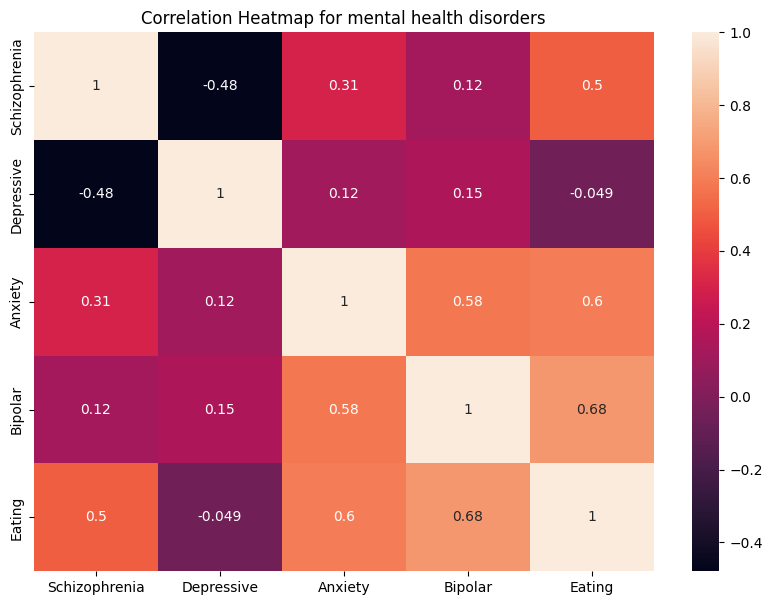

In [ ]:
# Filtering the grouped_df to extract the features for disorders
df_disorders = grouped_df[["Schizophrenia", 'Depressive', 'Anxiety', 'Bipolar', 'Eating']]

# Plotting the heatmap to find correlation between mental health disorders
plt.figure(figsize=(10,7))
sns.heatmap(df_disorders.corr(), annot=True)
plt.title("Correlation Heatmap for mental health disorders")
plt.show()

>**INFERENCE**: The Pearson's correlation coefficients between Anxiety and Eating disorders,  Anxiety and Bipolar disorders. and Bipolar and Eating disorders are quite strong. Also, the correlation between Schizophrenia and Eating disorders is fairly strong.

>This heatmap can be used by medical professionals to analyse if a certain disorder is triggered by another disorder. This can aid in the diagnosis of the disorder as they can get a better idea about the causes of a disorder in a patient.

 >Using Pearson's correlation (Heatmap), we can identify features with strong relationships and then clustering those features can help uncover meaningful patterns or subgroups within the data. By clustering different mental health disorders based on their correlations, we may discover how these disorders are related or how they manifest in distinct subgroups.

#Clustering Analysis
Now that the dataset has been explored and the useful inferences have been made based on different plots, clustering the dataset will become an easier task since we know which features on clustering, would lead to good useful results.

##Feature Selection

In [ ]:
# Using all the five mental health disorders as the features for clustering algorithms
X = grouped_df[["Schizophrenia", 'Depressive', 'Anxiety', 'Bipolar', 'Eating']]
X.head()

Schizophrenia  Depressive   Anxiety   Bipolar    Eating
0       0.104972    0.562701  0.420137  0.391090  0.062912
1       0.114851    0.495733  0.265112  0.319783  0.068901
2       0.346947    0.148981  0.274955  0.272038  0.070094
3       0.221618    0.426208  0.412871  0.433686  0.152247
4       0.561183    0.354296  0.535208  0.491666  0.258067

##KMeans Clustering

###Elbow Method





>The elbow method helps find the `optimal number of clusters` in K-means by plotting the Within Cluster Sum of Squares (WCSS) against different cluster counts and identifying the "elbow" point where the rate of WCSS reduction significantly slows, indicating the optimal cluster count.

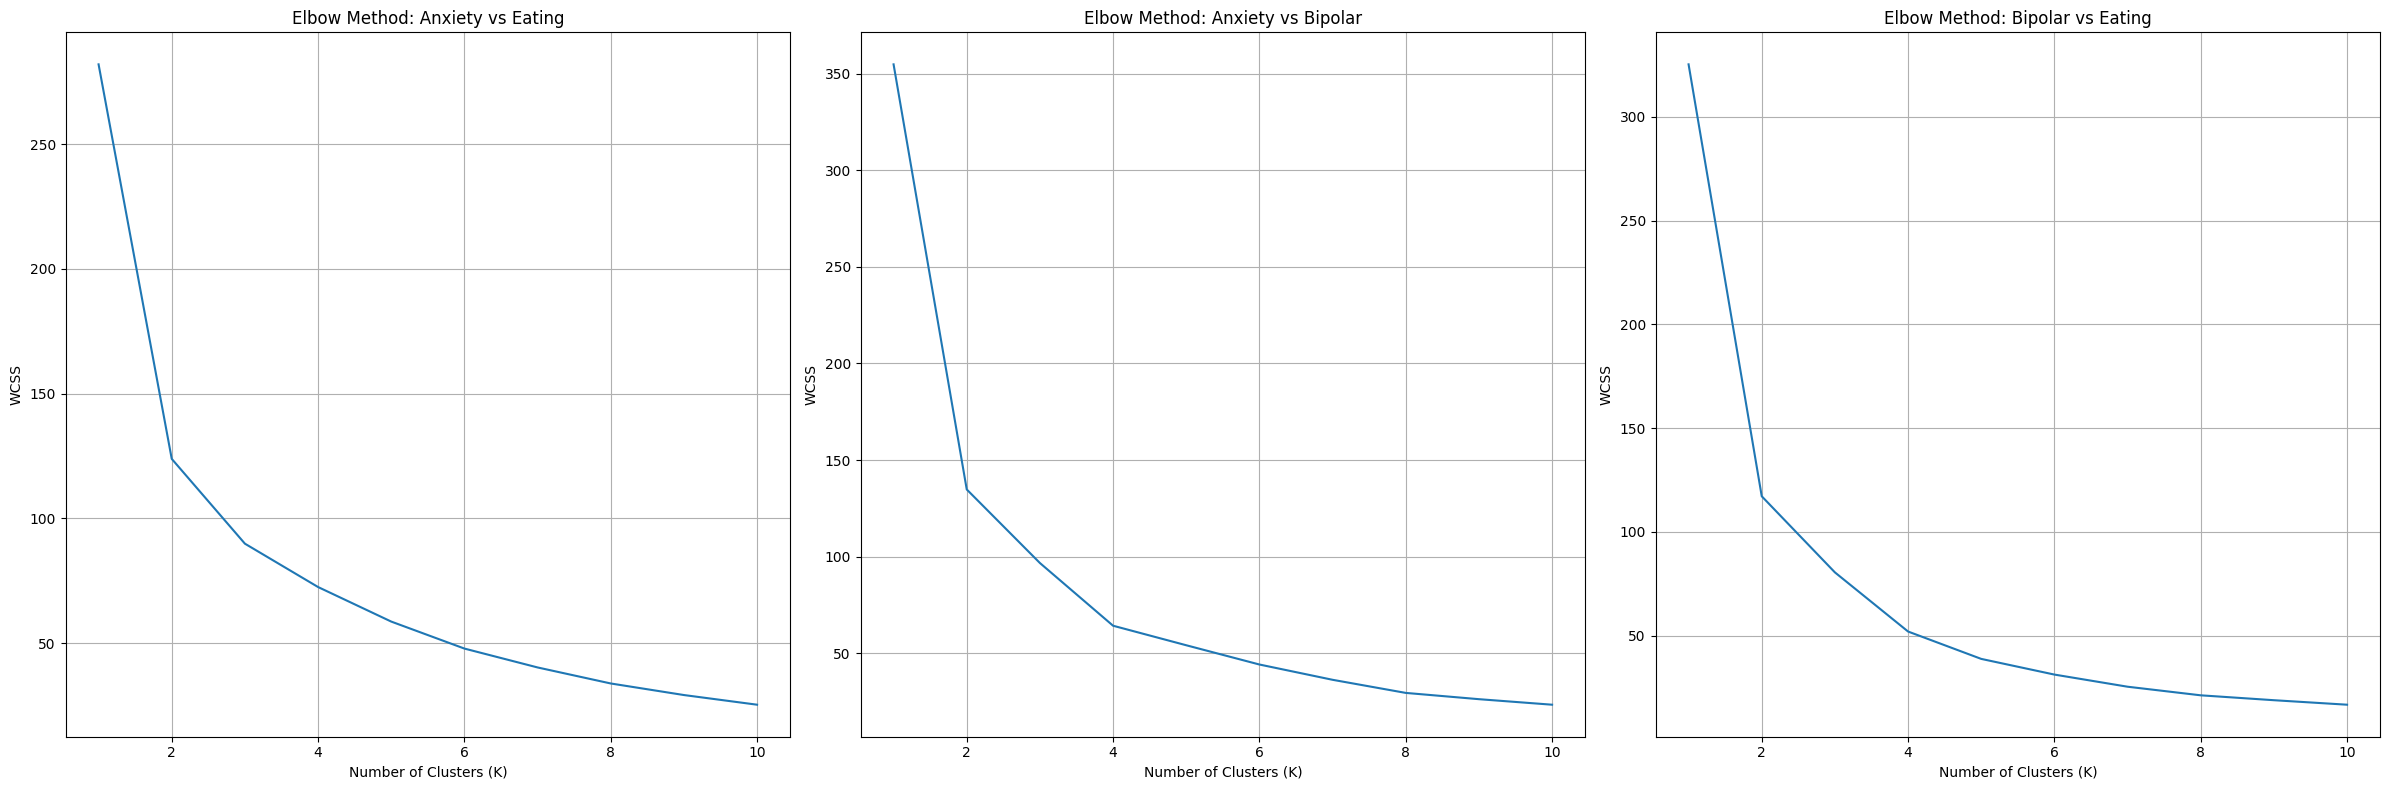

In [ ]:
# Defining feature pairs with strong correlation
feature_pairs = [("Anxiety", "Eating"), ("Anxiety", "Bipolar"), ("Bipolar", "Eating")]

fig, axs = plt.subplots(1, len(feature_pairs), figsize=(24, 8))

for i, (feat1, feat2) in enumerate(feature_pairs):
    X_pair = df[[feat1, feat2]]

    wcss = [] # Within Cluster Sum of Squares
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=42)
        kmeans.fit(X_pair)
        wcss.append(kmeans.inertia_)

    # Plotting the elbow method
    axs[i].plot(range(1, 11), wcss)
    axs[i].set_title(f"Elbow Method: {feat1} vs {feat2}")
    axs[i].set_xlabel("Number of Clusters (K)")
    axs[i].set_ylabel("WCSS")
    axs[i].grid()

plt.tight_layout()
plt.show()

>**INFERENCE**: Using the Elbow Method, the optimal number of clusters were found by finding the point after which the rate of WCSS starts to decrease significantly.
* For 'Anxiety' and 'Eating': `K=4`
* For 'Anxiety' and 'Bipolar': `K=4`
* For 'Bipolar' and 'Eating': `K=4`

###Clustering the data points with optimal value of K

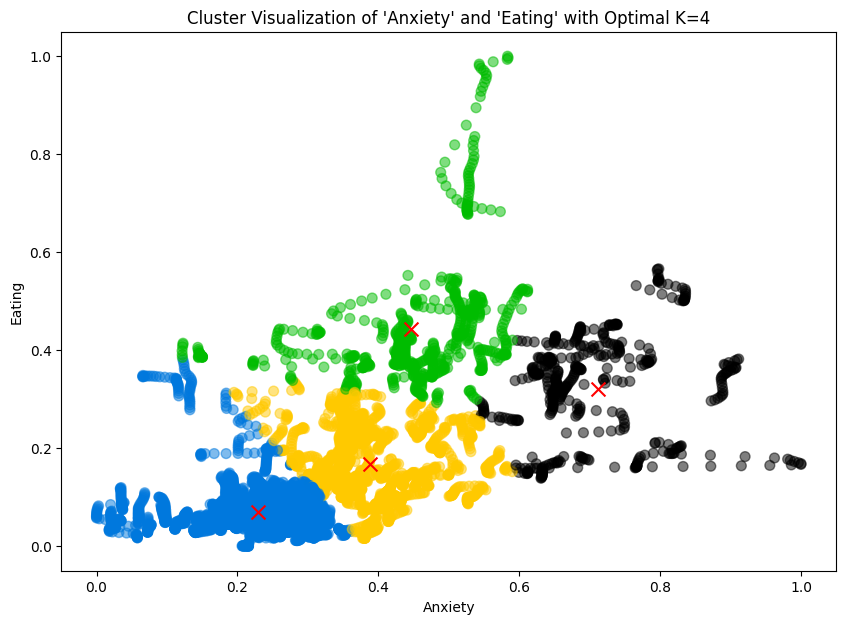

In [ ]:
# Initializing the optimal value of K
optimal_k = 4

# Clustering Anxiety and Bipolar disorders
X = df[["Anxiety", "Eating"]].values

# Perform KMeans clustering with the optimal value of K
clusterer_optimal = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=42)
cluster_labels_optimal = clusterer_optimal.fit_predict(X)

# Visualization of clusters with optimal value of K
plt.figure(figsize=(10, 7))
colors_optimal = cm.nipy_spectral(cluster_labels_optimal.astype(float) / optimal_k)
plt.scatter(X[:, 0], X[:, 1], c=colors_optimal, cmap='viridis', s=50, alpha=0.5)

for idx, centroid_optimal in enumerate(clusterer_optimal.cluster_centers_):
    plt.scatter(centroid_optimal[0], centroid_optimal[1], marker='x', c='red', s=100, label=f'Centroid {idx}')

plt.title(f"Cluster Visualization of 'Anxiety' and 'Eating' with Optimal K={optimal_k}")
plt.xlabel("Anxiety")
plt.ylabel("Eating")
plt.show()

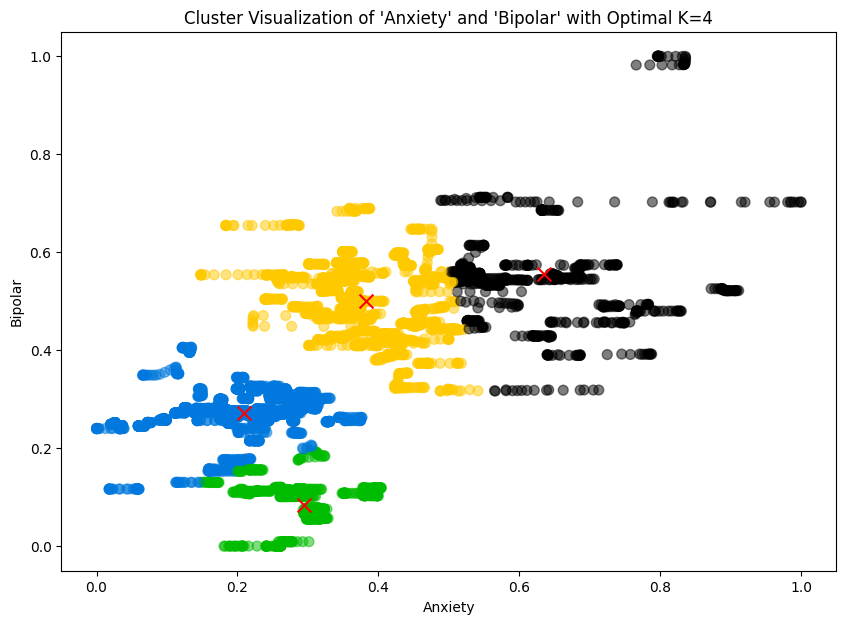

In [ ]:
# Clustering Anxiety and Bipolar disorders
X = df[["Anxiety", "Bipolar"]].values

# Perform KMeans clustering with the optimal value of K
clusterer_optimal = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=42)
cluster_labels_optimal = clusterer_optimal.fit_predict(X)

# Visualization of clusters with optimal value of K
plt.figure(figsize=(10, 7))
colors_optimal = cm.nipy_spectral(cluster_labels_optimal.astype(float) / optimal_k)
plt.scatter(X[:, 0], X[:, 1], c=colors_optimal, cmap='viridis', s=50, alpha=0.5)

for idx, centroid_optimal in enumerate(clusterer_optimal.cluster_centers_):
    plt.scatter(centroid_optimal[0], centroid_optimal[1], marker='x', c='red', s=100, label=f'Centroid {idx}')

plt.title(f"Cluster Visualization of 'Anxiety' and 'Bipolar' with Optimal K={optimal_k}")
plt.xlabel("Anxiety")
plt.ylabel("Bipolar")
plt.show()

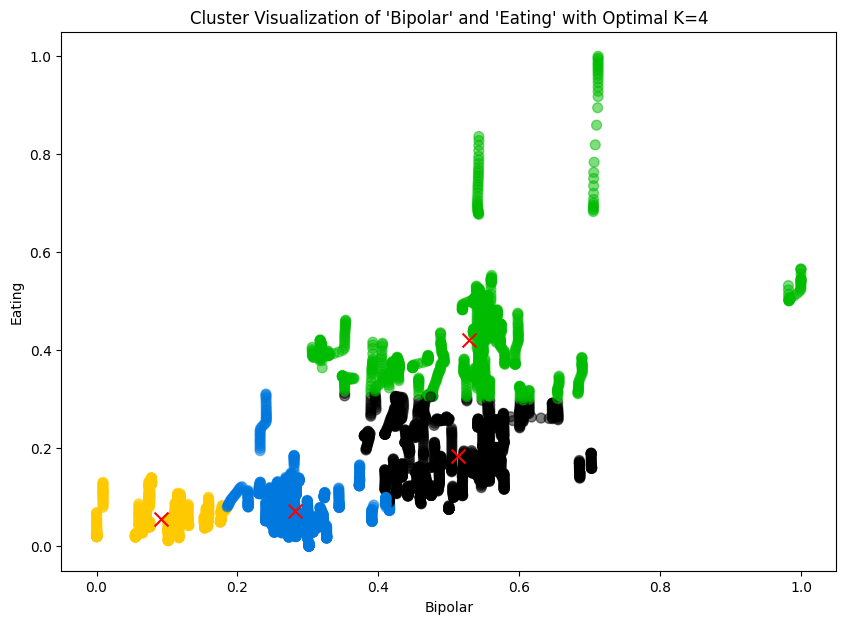

In [ ]:
# Clustering Bipolar and Eating disorders
X = df[["Bipolar", "Eating"]].values

# Perform KMeans clustering with the optimal value of K
clusterer_optimal = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=42)
cluster_labels_optimal = clusterer_optimal.fit_predict(X)

# Visualization of clusters with optimal value of K
plt.figure(figsize=(10, 7))
colors_optimal = cm.nipy_spectral(cluster_labels_optimal.astype(float) / optimal_k)
plt.scatter(X[:, 0], X[:, 1], c=colors_optimal, cmap='viridis', s=50, alpha=0.5)

for idx, centroid_optimal in enumerate(clusterer_optimal.cluster_centers_):
    plt.scatter(centroid_optimal[0], centroid_optimal[1], marker='x', c='red', s=100, label=f'Centroid {idx}')

plt.title(f"Cluster Visualization of 'Bipolar' and 'Eating' with Optimal K={optimal_k}")
plt.xlabel("Bipolar")
plt.ylabel("Eating")
plt.show()

>**INFERENCE**: The above scatter plots show how different disorders can be related with each other. There exists certain outliers in these plots, but overall, we get an idea of how different disorders can impact another disorder. Also, the `centroids` of each cluster is marked by a cross.

>**INFERENCE**: So far, the clustering between `Bipolar` and `Eating` visually seems to be the best one. We can verify this by Silhouette Score analysis.

###Silhouette Score Analysis
The silhouette score measures how well each data point fits into its assigned cluster, indicating the cohesion and separation of clusters. A higher silhouette score (closer to 1) suggests better-defined and well-separated clusters, while a lower score (closer to -1) indicates overlapping or poorly separated clusters.



>The red line on the silhouette plot shows the average silhouette score for the corresponding n_clusters. Thus, higher the value of average silhouette score, higher is the distance of a particular sample from the neighbouring clusters and better is the between-cluster separation and within-cluster closeness. Also from the thickness of the cluster label's distribution, the cluster size can be visualized.

>The value of Silhouette Score varies from -1 to +1.

>>`Silhouette Score = -1`: The samples may have been assigned to the wrong clusters.

>>`Silhouette Score = 0`: The samples are on or very close to the decision boundary between two neighbouring clusters.

>>`Silhouette Score = 1`: The samples are far away from the neighbouring clusters.


For n_clusters=3:	Average Silhouette Score=0.4285890898028628



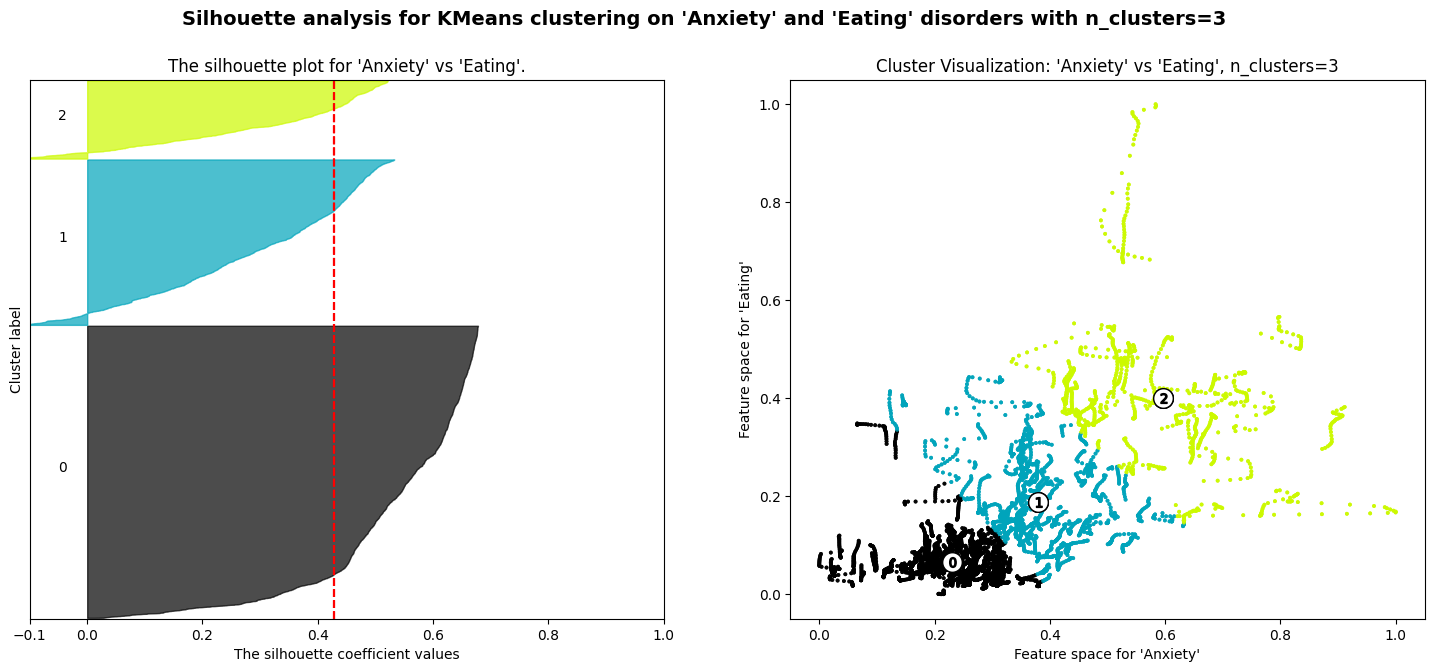


For n_clusters=4:	Average Silhouette Score=0.43095909801514876



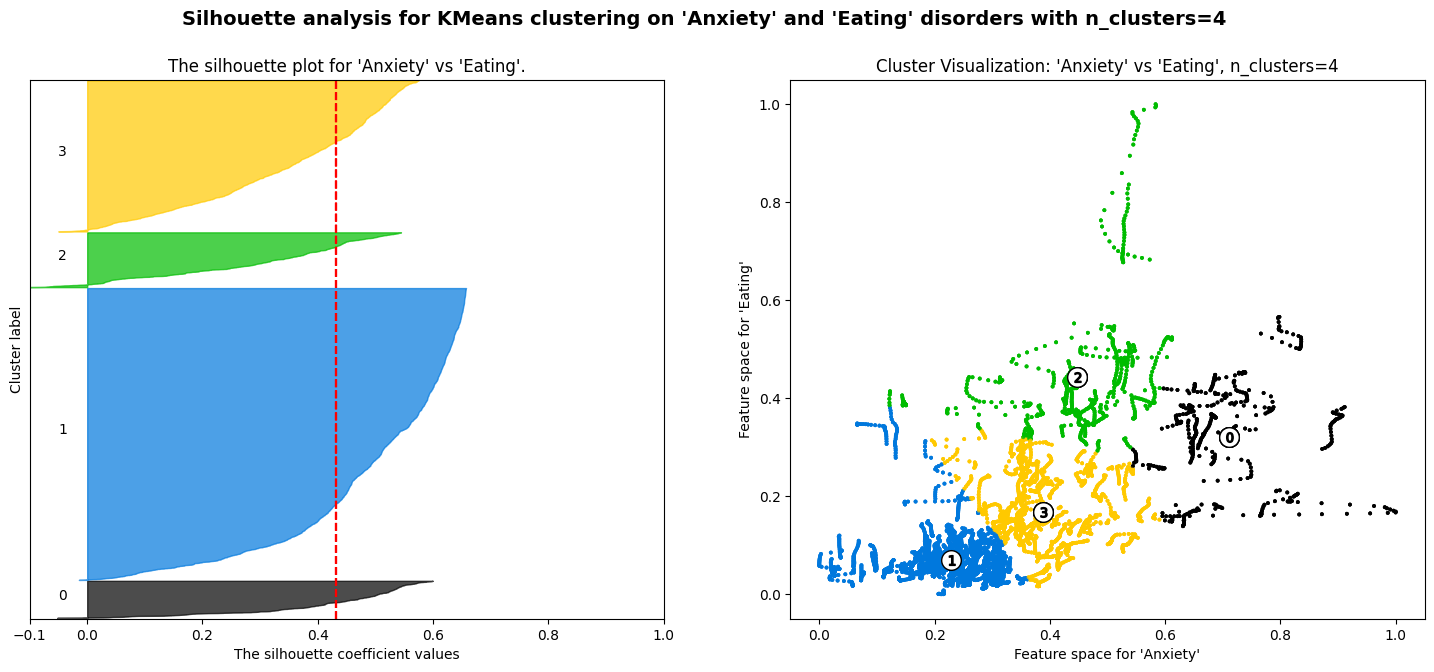


For n_clusters=5:	Average Silhouette Score=0.3650044698134029



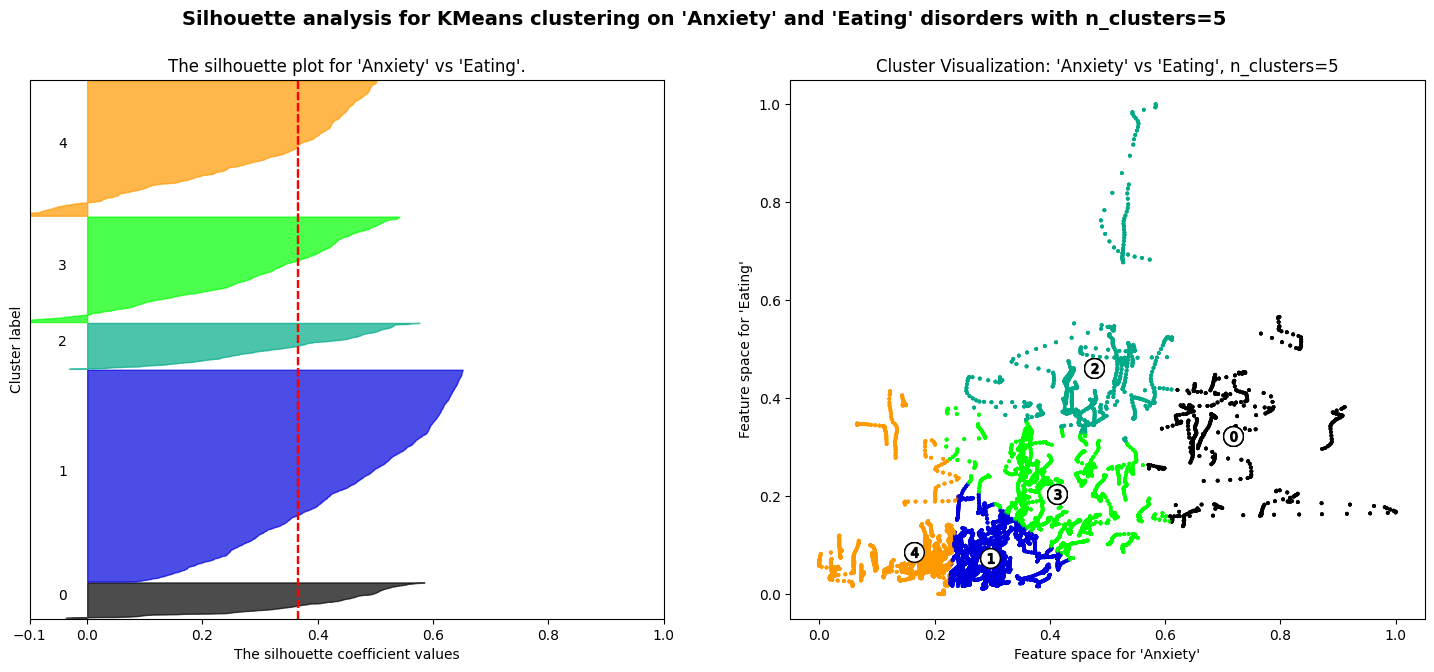

In [ ]:
# Defining feature_pairs for clustering
feature_pairs = [("Anxiety", "Eating"), ("Anxiety", "Bipolar"), ("Bipolar", "Eating")]

# Defining a range of n_clusters to analyse
range_n_clusters = [3, 4, 5]

# Clustering Anxiety and Eating disorders
X = df[["Anxiety", "Eating"]].values

for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator
  clusterer = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300, n_init=10, random_state=42)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"\nFor n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}\n")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for 'Anxiety' vs 'Eating'.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title(f"Cluster Visualization: 'Anxiety' vs 'Eating', n_clusters={n_clusters}")
      ax2.set_xlabel(f"Feature space for 'Anxiety'")
      ax2.set_ylabel(f"Feature space for 'Eating'")

      plt.suptitle(
          f"Silhouette analysis for KMeans clustering on 'Anxiety' and 'Eating' disorders with n_clusters={n_clusters}",
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

>**INFERENCE**: The optimal number of clusters (K=4) can be verified by the average silhouette of score of K=4 being the maximum. Thus, for `Anxiety` and `Eating`, K=4 is proven to be the most optimal one amongst the values 3, 4, and 5.


For n_clusters=3:	Average Silhouette Score=0.5170822901830578



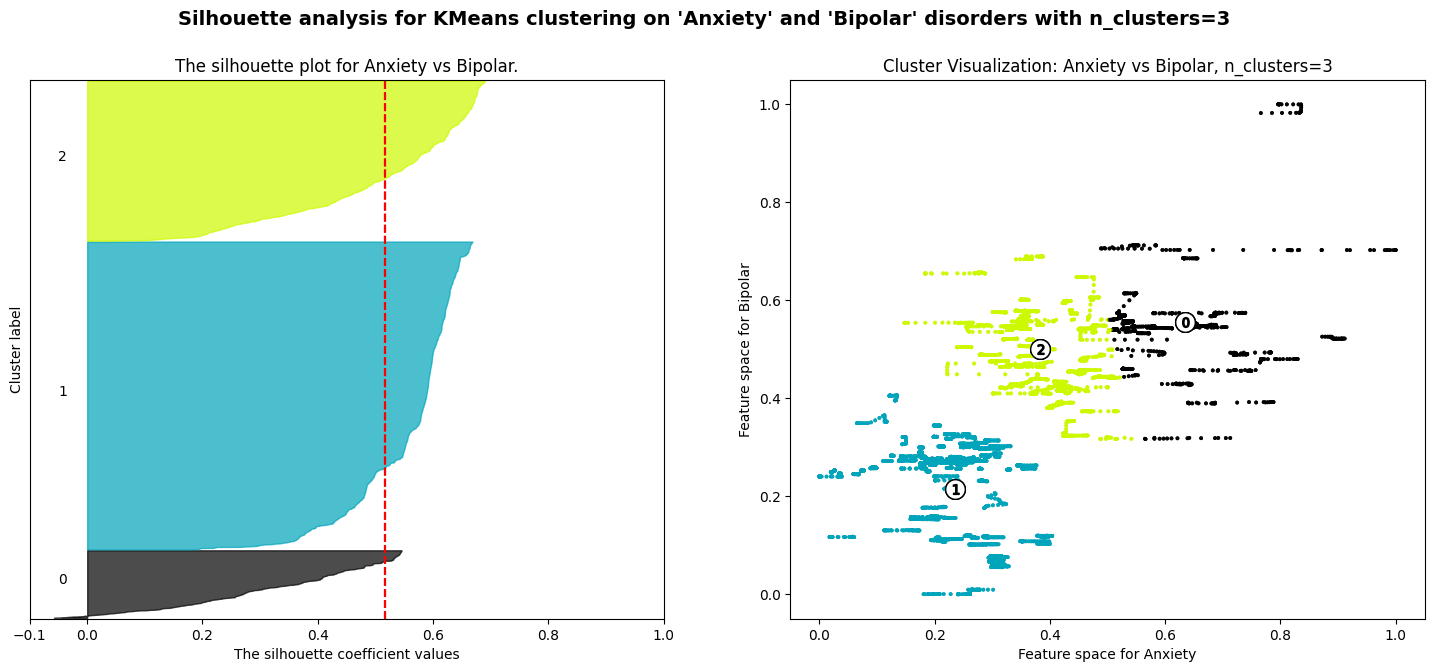


For n_clusters=4:	Average Silhouette Score=0.5194961064689549



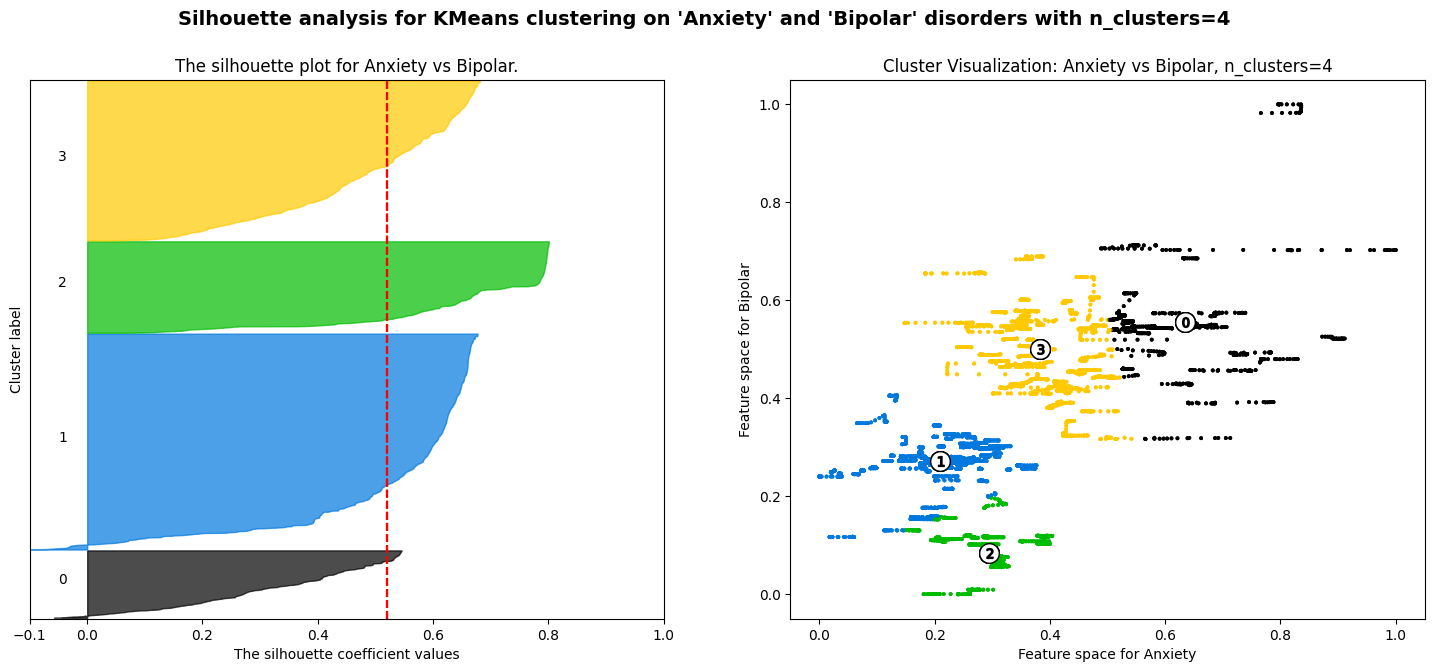


For n_clusters=5:	Average Silhouette Score=0.492267835730741



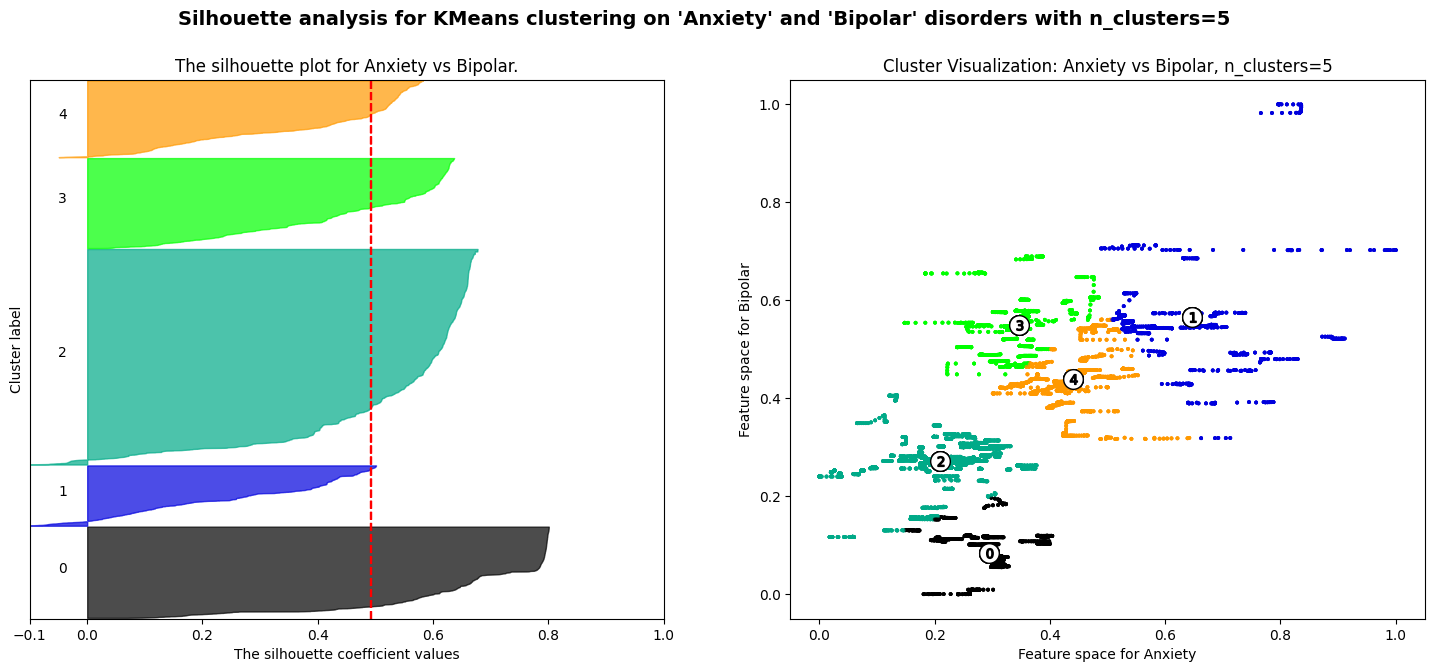

In [ ]:
X = df[["Anxiety", "Bipolar"]].values
for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator
  clusterer = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300, n_init=10, random_state=42)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"\nFor n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}\n")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for Anxiety vs Bipolar.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title(f"Cluster Visualization: Anxiety vs Bipolar, n_clusters={n_clusters}")
      ax2.set_xlabel(f"Feature space for Anxiety")
      ax2.set_ylabel(f"Feature space for Bipolar")

      plt.suptitle(
          f"Silhouette analysis for KMeans clustering on 'Anxiety' and 'Bipolar' disorders with n_clusters={n_clusters}",
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

>**INFERENCE**: The optimal number of clusters (K=4) can be verified by the average silhouette of score of K=4 being the maximum. Thus, for `Anxiety` and `Bipolar`, K=4 is most optimal one. However, for K=3 and K=4, the difference is the average silhouette score is very less, so using K=3 would also give good results.


For n_clusters=3:	Average Silhouette Score=0.5474743197930444



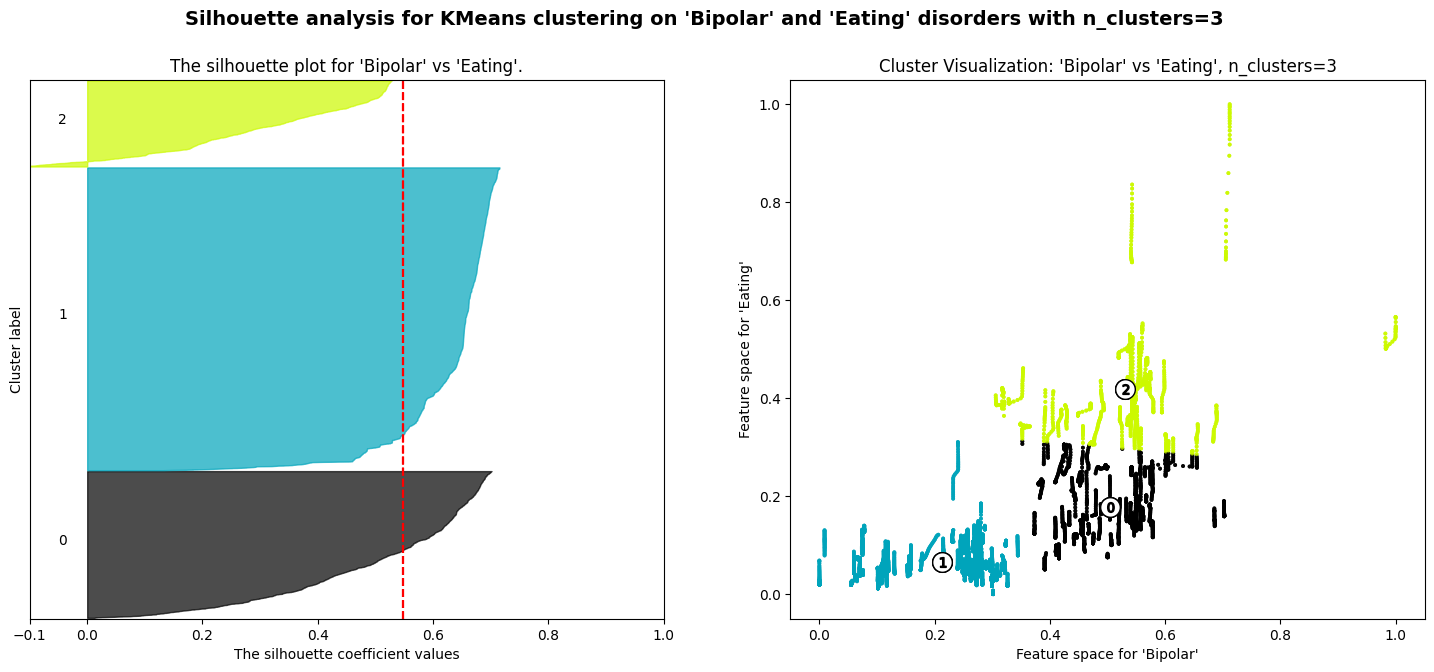


For n_clusters=4:	Average Silhouette Score=0.5680461584373248



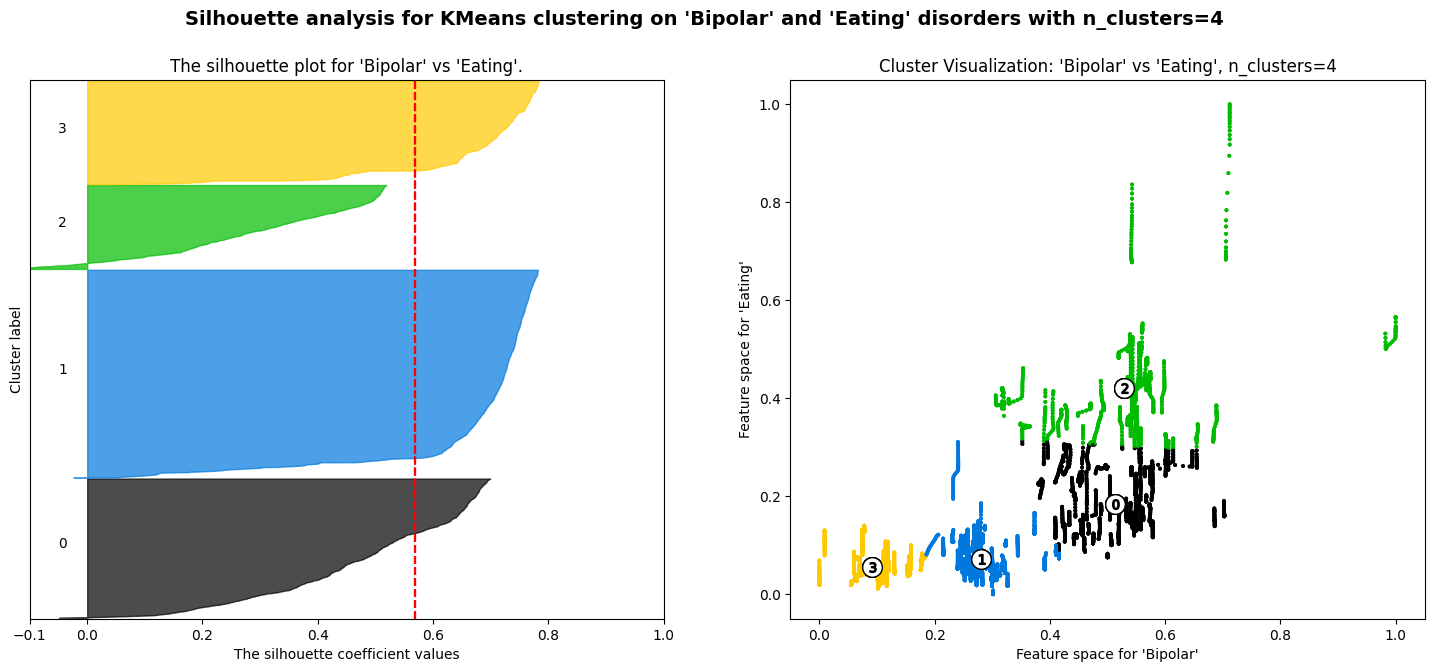


For n_clusters=5:	Average Silhouette Score=0.5775971847568756



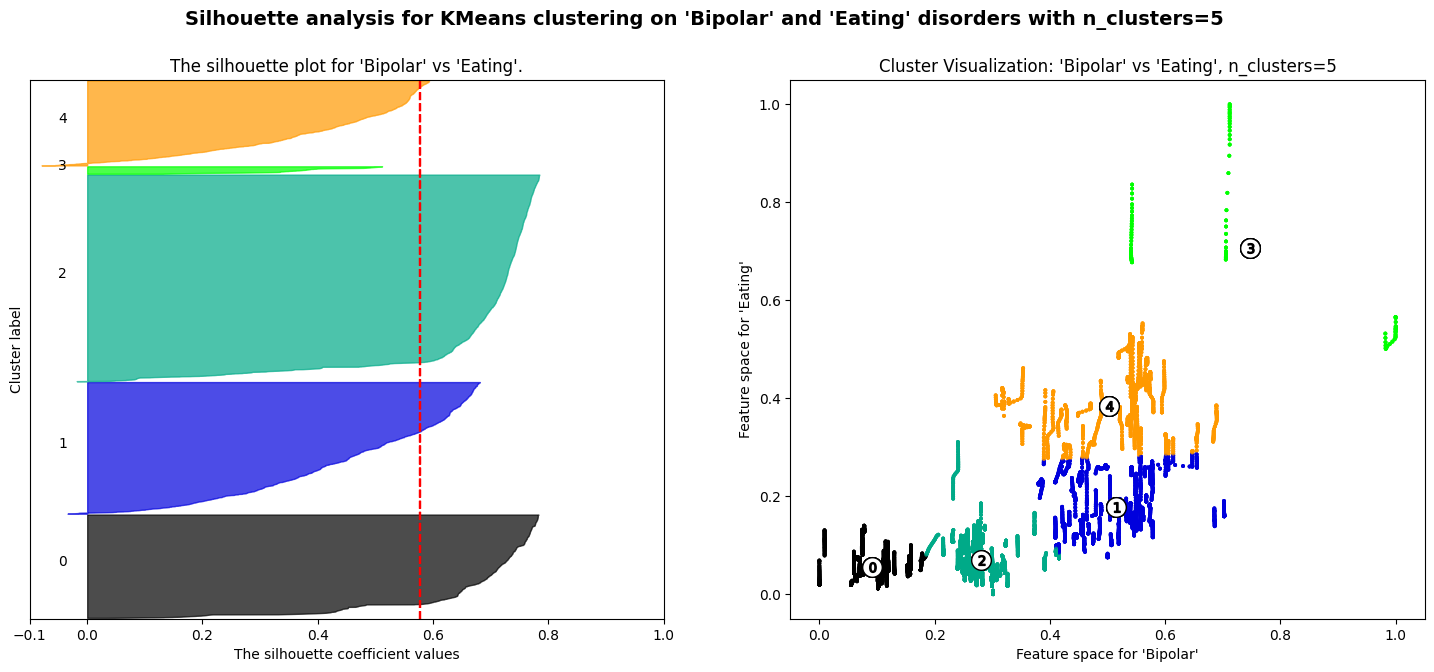

In [ ]:
X = df[["Bipolar", "Eating"]].values
for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator
  clusterer = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300, n_init=10, random_state=42)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"\nFor n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}\n")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for 'Bipolar' vs 'Eating'.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title(f"Cluster Visualization: 'Bipolar' vs 'Eating', n_clusters={n_clusters}")
      ax2.set_xlabel(f"Feature space for 'Bipolar'")
      ax2.set_ylabel(f"Feature space for 'Eating'")

      plt.suptitle(
          f"Silhouette analysis for KMeans clustering on 'Bipolar' and 'Eating' disorders with n_clusters={n_clusters}",
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

>**INFERENCE**: Using Elbow Method, we get K=4 to be the most optimal one for `Bipolar` and `Eating`. However, according to Silhouette Score analysis, K=5 has the highest average silhouette score, which means according to Silhouette Score analysis, K=5 is the optimal number for clustering.

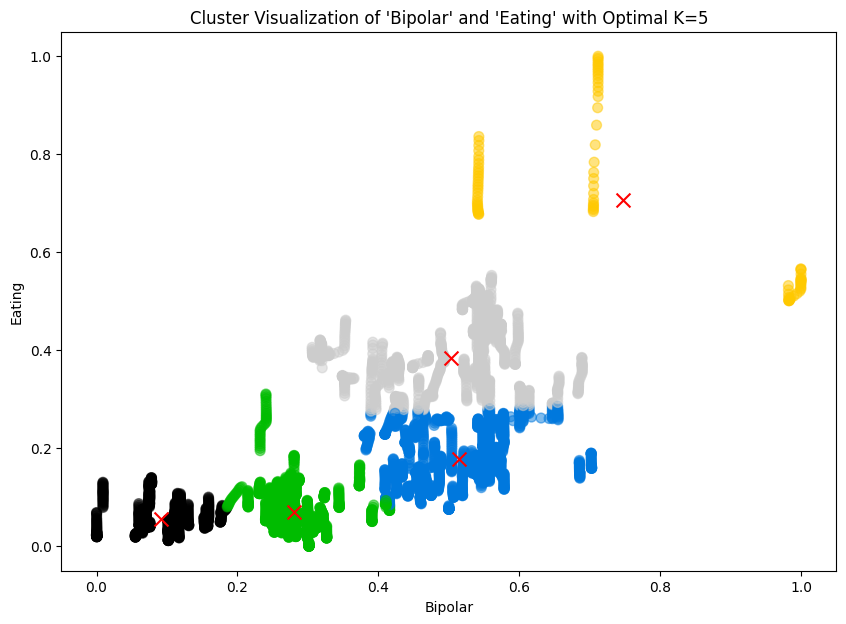

In [ ]:
# Clustering Bipolar and Eating disorders for K=5
X = df[["Bipolar", "Eating"]].values

# Perform KMeans clustering with the K=5
clusterer_optimal = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=42)
cluster_labels_optimal = clusterer_optimal.fit_predict(X)

# Visualization of clusters with K=5
plt.figure(figsize=(10, 7))
colors_optimal = cm.nipy_spectral(cluster_labels_optimal.astype(float) / optimal_k)
plt.scatter(X[:, 0], X[:, 1], c=colors_optimal, cmap='viridis', s=50, alpha=0.5)

for idx, centroid_optimal in enumerate(clusterer_optimal.cluster_centers_):
    plt.scatter(centroid_optimal[0], centroid_optimal[1], marker='x', c='red', s=100, label=f'Centroid {idx}')

plt.title(f"Cluster Visualization of 'Bipolar' and 'Eating' with Optimal K=5")
plt.xlabel("Bipolar")
plt.ylabel("Eating")
plt.show()

>**INFERENCE**: The 5th cluster (yellow cluster), has very few datapoints and they form three "sub-groups". Thus the 5th cluster is not a good cluster. Also the centroid is away from the datapoints which also shows how far away the data points are from each other.

>**INFERENCE**: The 5th cluster though can be used to detect the outliers in the data. Removing the data points under the 5th cluster can help us get a better idea about the relation of Bipolar disorder with Eating disorder.

>From the above Silhouette Score analysis, the highest silhouette scores for each of the clusters are (upto 4 decimal places):
* `Anxiety` and `Eating`: 0.4309 (K=4)
* `Anxiety` and `Bipolar`: 0.5194 (K=4)
* `Bipolar` and `Eating`: 0.5775 (K=5)



>Thus, `Bipolar` and `Eating` have the highest silhouette score amongst all the cluster groups. This can suggest that amongst the three disorders, these two disorders have distinct patterns or characteristics that can be effectively separated into different clusters. This analysis can help the medical professionals diagnose the patients more efficiently.

##Agglomerative Clustering

###Dendogram Method
The dendrogram method in agglomerative clustering creates a tree-like structure where each data point starts as an individual cluster and gradually merges with others based on similarity. The height of branches in the dendrogram indicates the dissimilarity between clusters or data points, aiding in visualizing cluster relationships and determining the optimal number of clusters.

In [ ]:
# Defining a function to create the dendogram for the input
def plot_dendrogram(model, **kwargs):
  """
    Docstring:
    Plots a dendogram for Hierarchical Clustering to analyse the most optimal number of clusters.
  """

  # Create linkage matrix and then plot the dendrogram
  counts = np.zeros(model.children_.shape[0]) # create the counts of samples under each node
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
  ).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

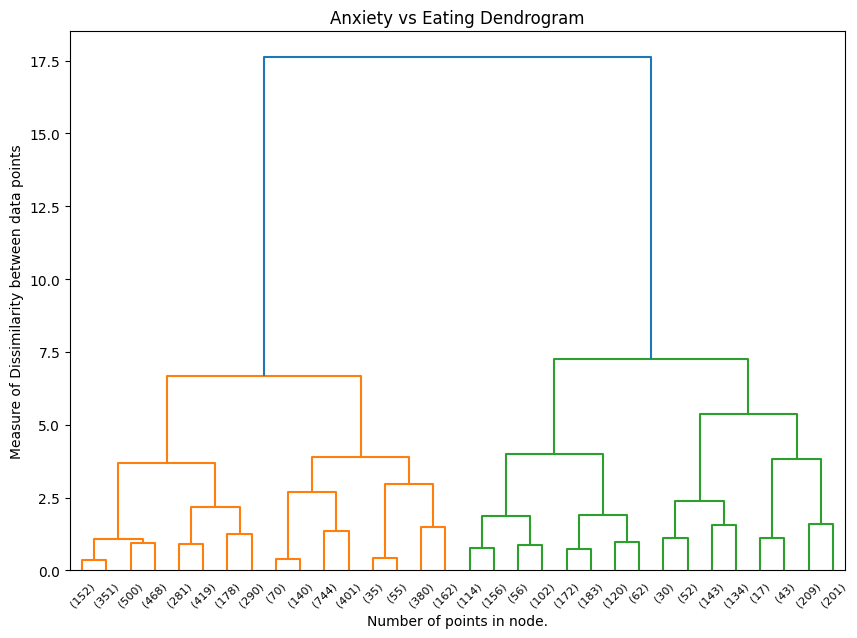

In [ ]:
# Analysing Anxiety and Eating disorders
X = df[["Anxiety", "Eating"]].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plt.figure(figsize=(10,7))
plt.title("Anxiety vs Eating Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=4) # plotting the top four levels of the dendrogram
plt.xlabel("Number of points in node.")
plt.ylabel("Measure of Dissimilarity between data points")
plt.show()

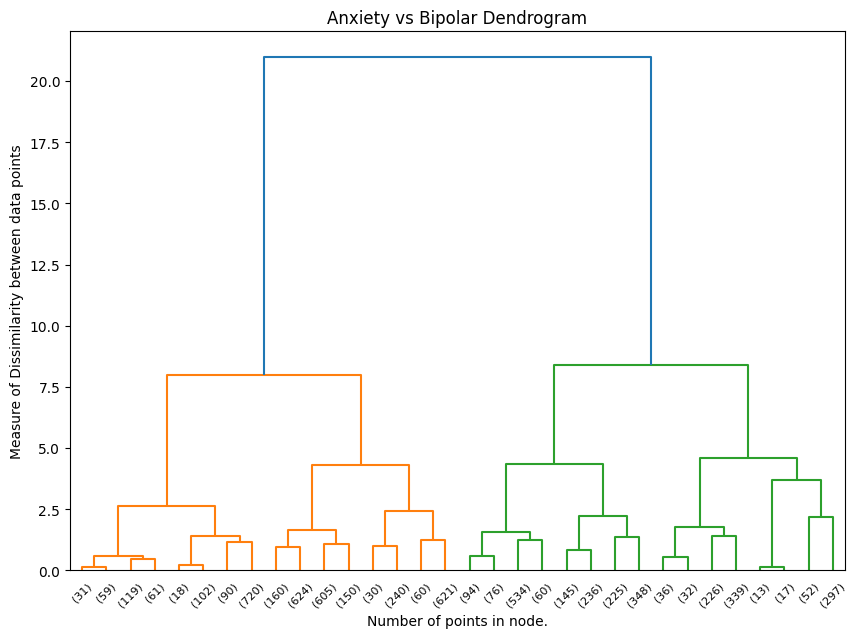

In [ ]:
# Analysing Anxiety and Bipolar disorders
X = df[["Anxiety", "Bipolar"]].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plt.figure(figsize=(10,7))
plt.title("Anxiety vs Bipolar Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=4) # plotting the top four levels of the dendrogram
plt.xlabel("Number of points in node.")
plt.ylabel("Measure of Dissimilarity between data points")
plt.show()

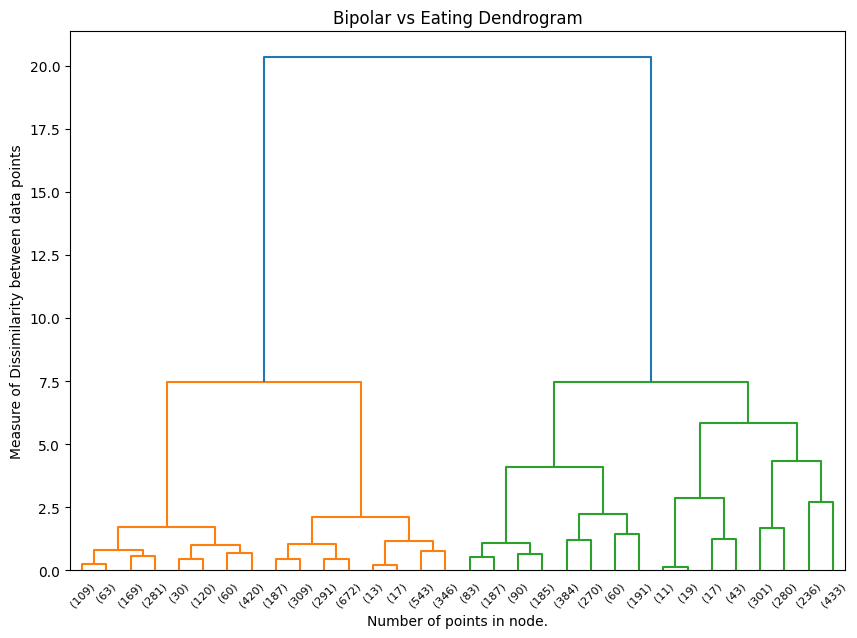

In [ ]:
# Analysing Bipolar and Eating disorders
X = df[["Bipolar", "Eating"]].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plt.figure(figsize=(10,7))
plt.title("Bipolar vs Eating Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=4) # plotting the top four levels of the dendrogram
plt.xlabel("Number of points in node.")
plt.ylabel("Measure of Dissimilarity between data points")
plt.show()

>**INFERENCE**: In the above dendograms, an optimal number of two clusters implies that the vertical distances at which the clusters merge are sufficiently large, indicating significant dissimilarities between the clusters

###Clustering the data points with optimal value of n_clusters

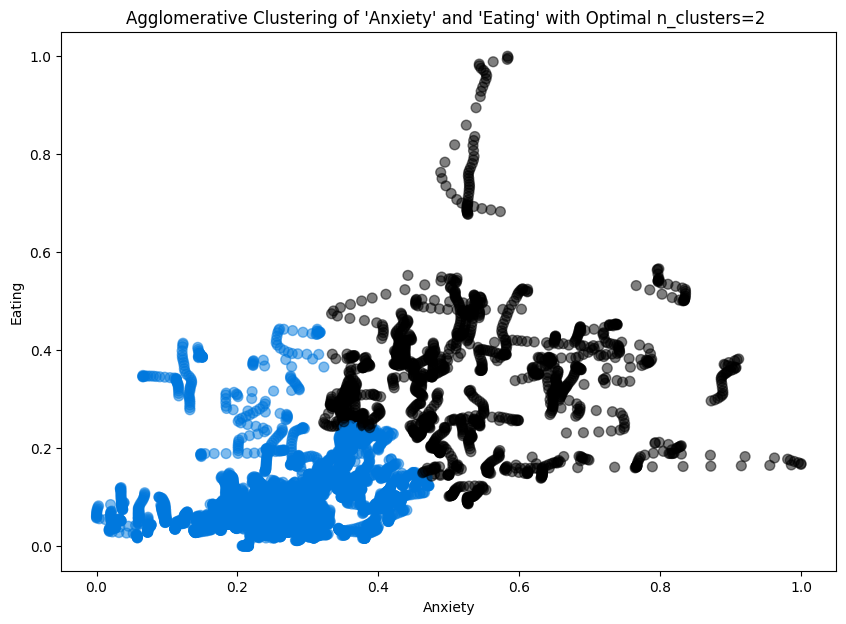

In [ ]:
# Initializing the optimal value of n_clusters
n_clusters_optimal = 2

# Clustering Anxiety and Bipolar disorders
X = df[["Anxiety", "Eating"]].values

# Perform Agglomerative clustering with the optimal value of n_clusters
agglomerative_clusterer_optimal = AgglomerativeClustering(n_clusters=n_clusters_optimal, metric="euclidean", linkage="complete")
agglomerative_cluster_labels_optimal = agglomerative_clusterer_optimal.fit_predict(X)

# Visualization of clusters with optimal value of n_clusters for Agglomerative clustering
plt.figure(figsize=(10, 7))
colors_agglomerative_optimal = cm.nipy_spectral(agglomerative_cluster_labels_optimal.astype(float) / optimal_k)
plt.scatter(X[:, 0], X[:, 1], c=colors_agglomerative_optimal, cmap='viridis', s=50, alpha=0.5)
plt.title(f"Agglomerative Clustering of 'Anxiety' and 'Eating' with Optimal n_clusters={n_clusters_optimal} ")
plt.xlabel("Anxiety")
plt.ylabel("Eating")
plt.show()

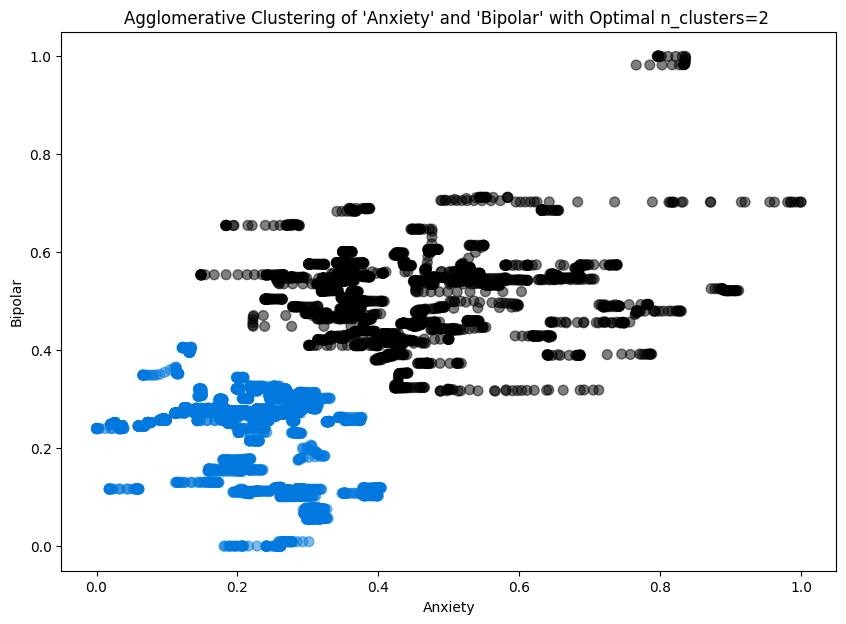

In [ ]:
# Clustering Anxiety and Eating disorders
X = df[["Anxiety", "Bipolar"]].values

# Perform Agglomerative clustering with the optimal value of n_clusters
agglomerative_clusterer_optimal = AgglomerativeClustering(n_clusters=n_clusters_optimal, metric="euclidean", linkage="complete")
agglomerative_cluster_labels_optimal = agglomerative_clusterer_optimal.fit_predict(X)

# Visualization of clusters with optimal value of n_clusters for Agglomerative clustering
plt.figure(figsize=(10, 7))
colors_agglomerative_optimal = cm.nipy_spectral(agglomerative_cluster_labels_optimal.astype(float) / optimal_k)
plt.scatter(X[:, 0], X[:, 1], c=colors_agglomerative_optimal, cmap='viridis', s=50, alpha=0.5)
plt.title(f"Agglomerative Clustering of 'Anxiety' and 'Bipolar' with Optimal n_clusters={n_clusters_optimal} ")
plt.xlabel("Anxiety")
plt.ylabel("Bipolar")
plt.show()

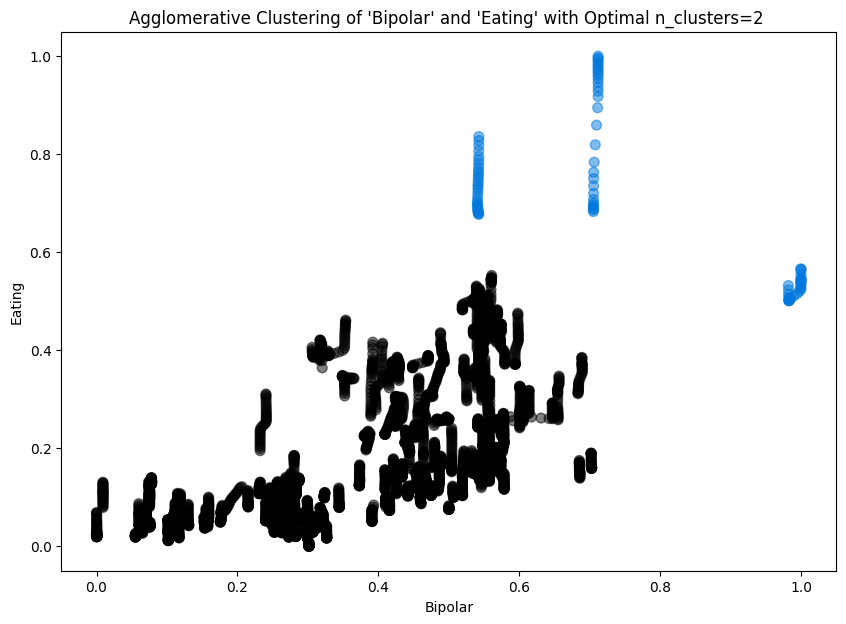

In [ ]:
# Clustering Bipolar and Eating disorders
X = df[["Bipolar", "Eating"]].values

# Perform Agglomerative clustering with the optimal value of n_clusters
agglomerative_clusterer_optimal = AgglomerativeClustering(n_clusters=n_clusters_optimal, metric="euclidean", linkage="complete")
agglomerative_cluster_labels_optimal = agglomerative_clusterer_optimal.fit_predict(X)

# Visualization of clusters with optimal value of n_clusters for Agglomerative clustering
plt.figure(figsize=(10, 7))
colors_agglomerative_optimal = cm.nipy_spectral(agglomerative_cluster_labels_optimal.astype(float) / optimal_k)
plt.scatter(X[:, 0], X[:, 1], c=colors_agglomerative_optimal, cmap='viridis', s=50, alpha=0.5)
plt.title(f"Agglomerative Clustering of 'Bipolar' and 'Eating' with Optimal n_clusters={n_clusters_optimal} ")
plt.xlabel("Bipolar")
plt.ylabel("Eating")
plt.show()

>**INFERENCE**: Clustering of `Bipolar` and `Eating` disorders seems to be the best since the between-cluster distance is large. We can verify this by Silhouette Score Analysis.

###Comparing different linkages of Agglomerative Clustering

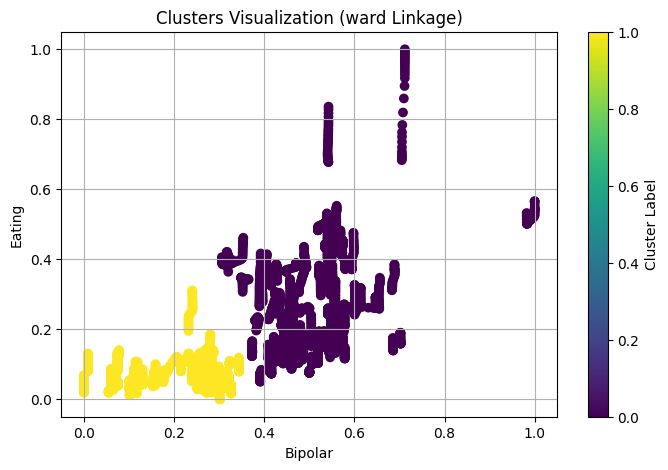

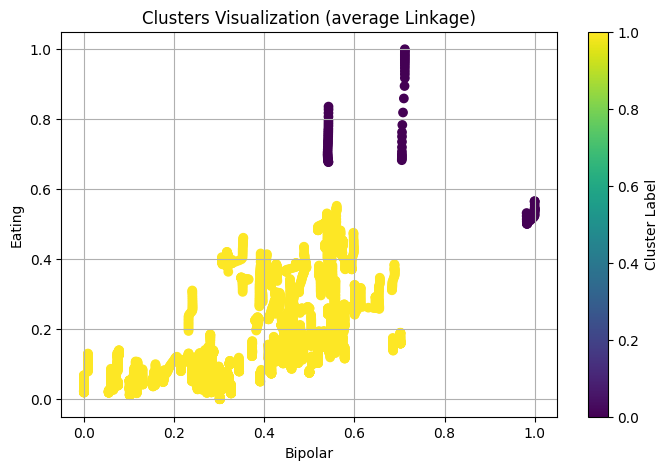

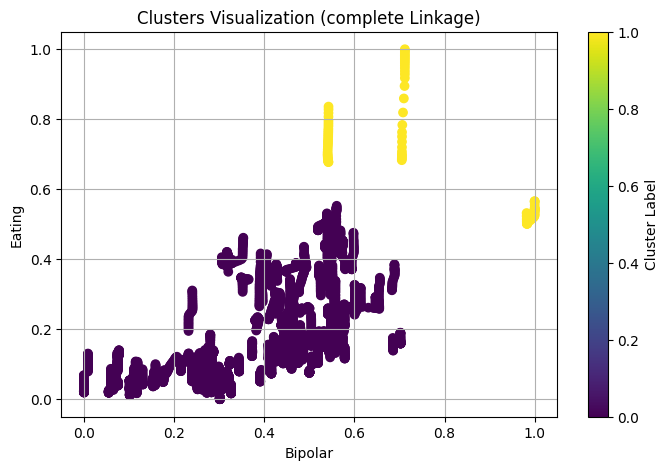

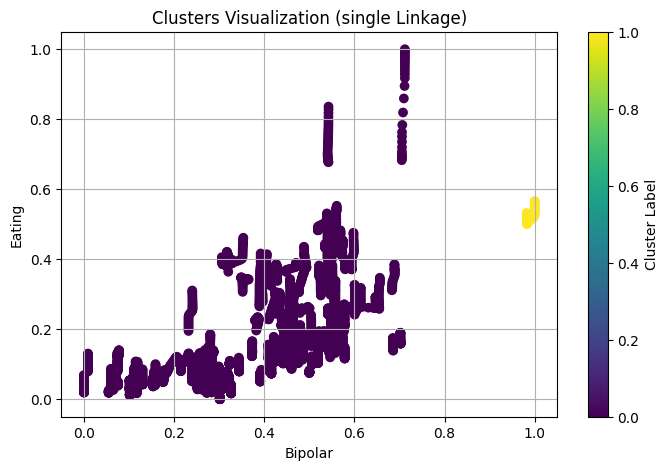

In [ ]:
# Clustering the 'Bipolar' and 'Eating' disorders for different linkages
linkage_methods = ["ward", "average", "complete", "single"]
X = df[["Bipolar", "Eating"]]

# Visualizing Clusters
for linkage in linkage_methods:
    # Cluster the data
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2, metric="euclidean")
    cluster_labels = clustering.fit_predict(X)

    plt.figure(figsize=(8, 5))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel('Bipolar')
    plt.ylabel('Eating')
    plt.title(f'Clusters Visualization ({linkage} Linkage)')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

>**INFERENCE**:
* `Complete` linkage and `Average` linkage provided similar results.
* `Ward` linkage resulted in outliers in the purple coloured cluster.
* `Single` linkage has most of the data distributed in a single cluster(purple coloured cluster) leaving the

###Silhouette Score Analysis


For n_clusters=2:	Average Silhouette Score=0.5657528506624548



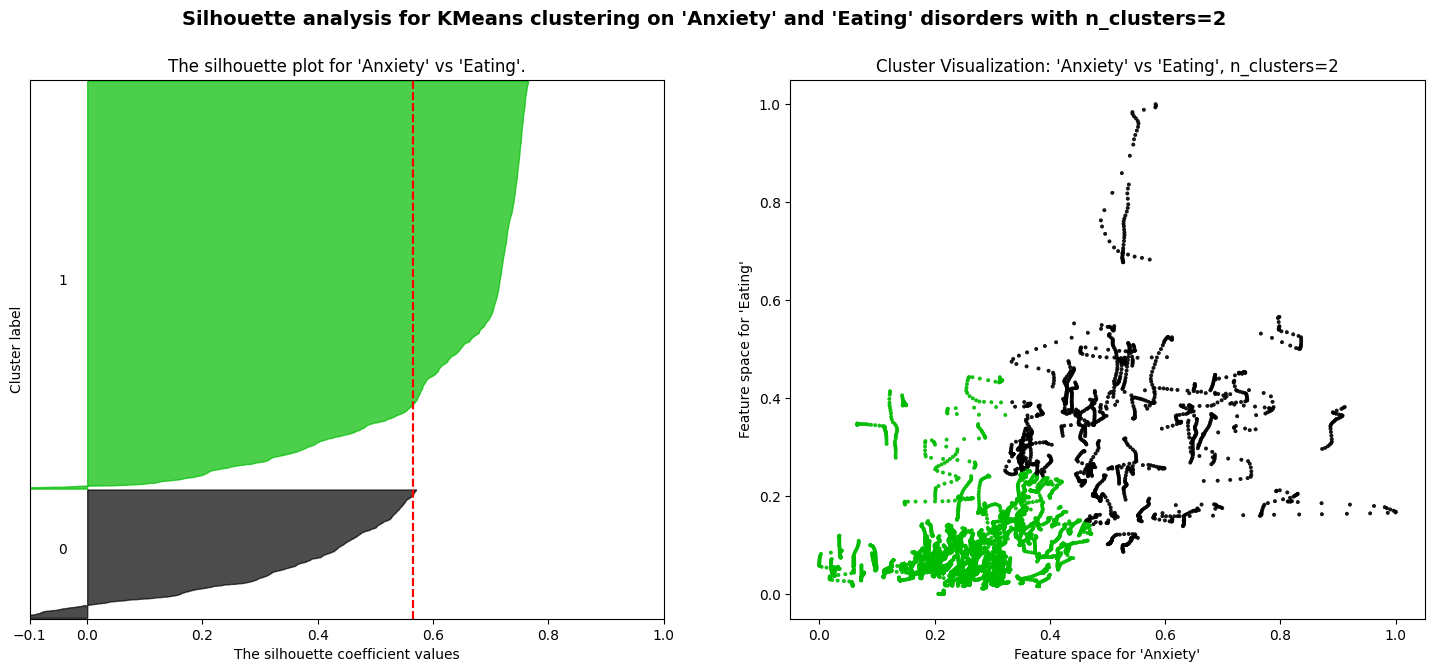


For n_clusters=3:	Average Silhouette Score=0.5534374779605096



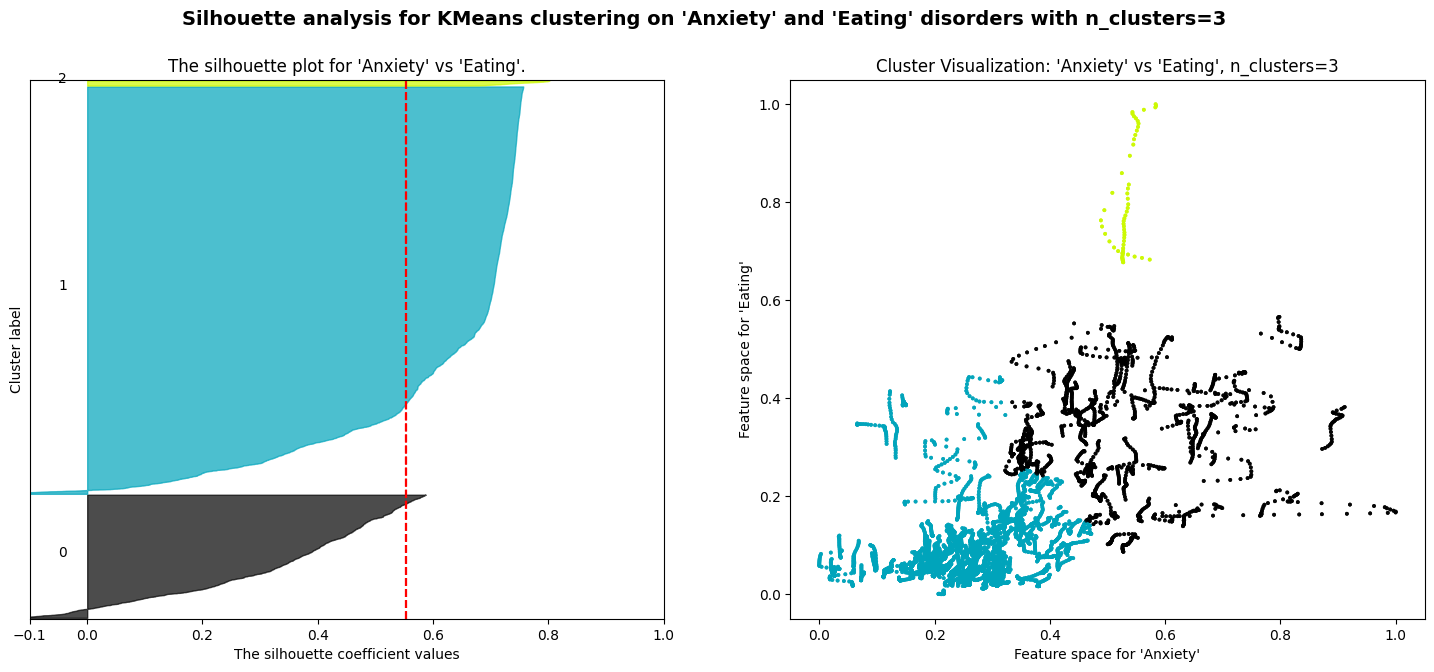


For n_clusters=4:	Average Silhouette Score=0.507211637942004



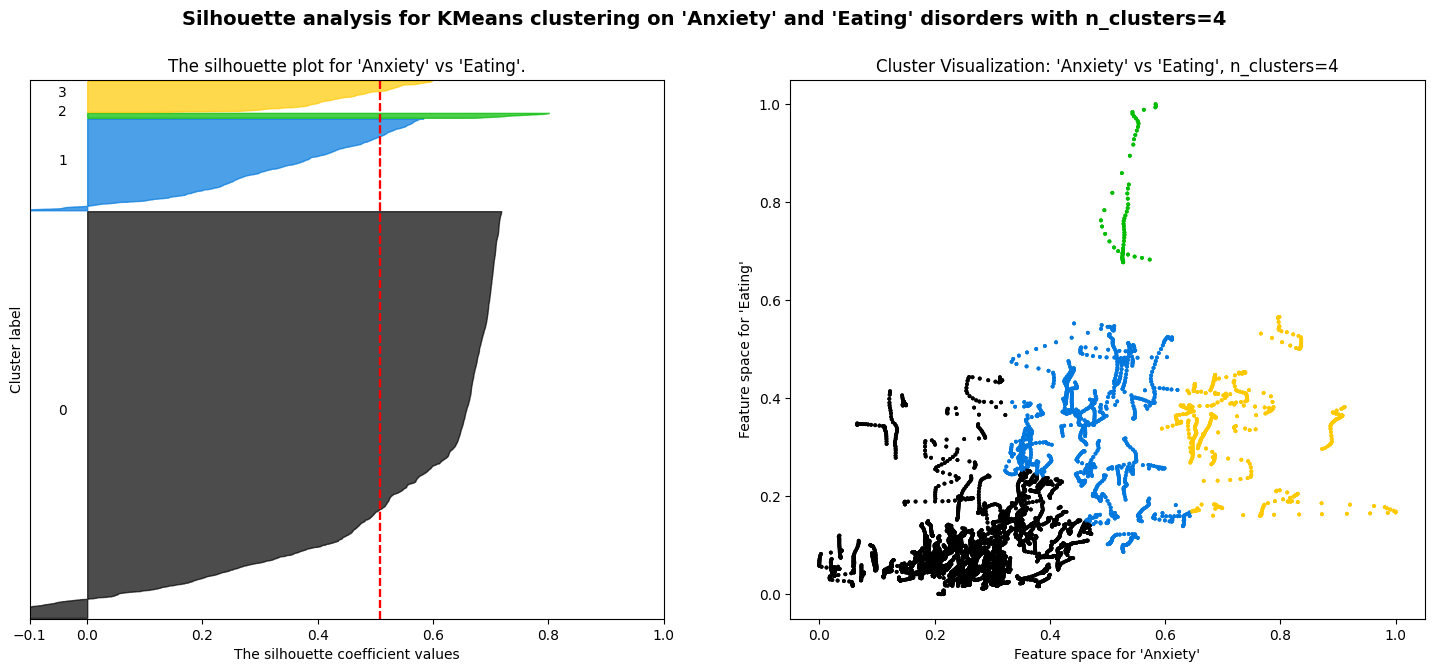


For n_clusters=5:	Average Silhouette Score=0.3765349319544205



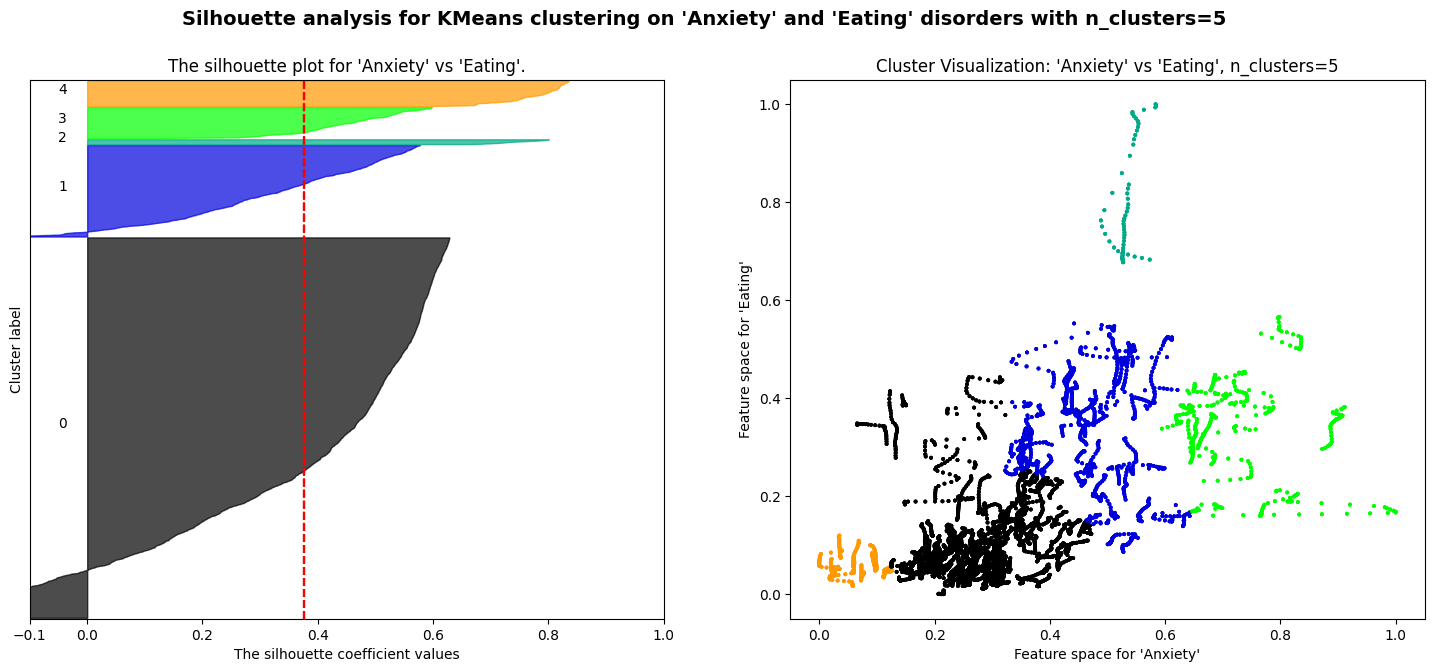

In [ ]:
# Defining a range of n_clusters to analyse the features
range_n_clusters = [2, 3, 4, 5]

# Clustering Anxiety and Eating disorders
X = df[["Anxiety", "Eating"]].values

for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer
  clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="complete")
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"\nFor n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}\n")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for 'Anxiety' vs 'Eating'.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    ax2.set_title(f"Cluster Visualization: 'Anxiety' vs 'Eating', n_clusters={n_clusters}")
    ax2.set_xlabel(f"Feature space for 'Anxiety'")
    ax2.set_ylabel(f"Feature space for 'Eating'")

    plt.suptitle(
      f"Silhouette analysis for KMeans clustering on 'Anxiety' and 'Eating' disorders with n_clusters={n_clusters}",
      fontsize=14,
      fontweight="bold",
    )

  plt.show()

>**INFERENCE**: `n_clusters=2` has the highest average silhouette score. For n_clusters=3, even though the average silhouette score is close to that of n_clusters=2, the cluster size of 3rd cluster(cluster number 2) is very small, as compared to rest of the two clusters. Hence n_clusters=2 is verified to be the optimal number of clusters. Also n_clusters=4 and 5 have low average silhouette scores as compared to n_clusters=2 and 3.


For n_clusters=2:	Average Silhouette Score=0.5689569920678943



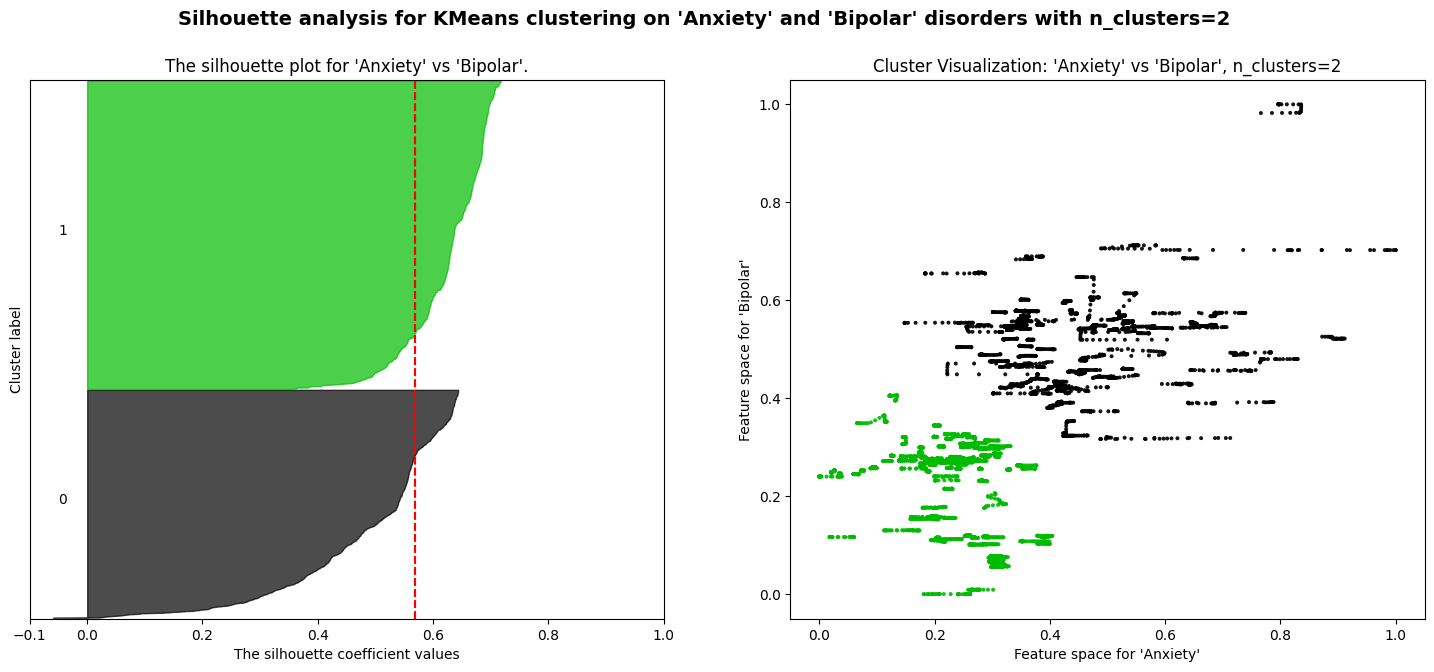


For n_clusters=3:	Average Silhouette Score=0.5551916645537203



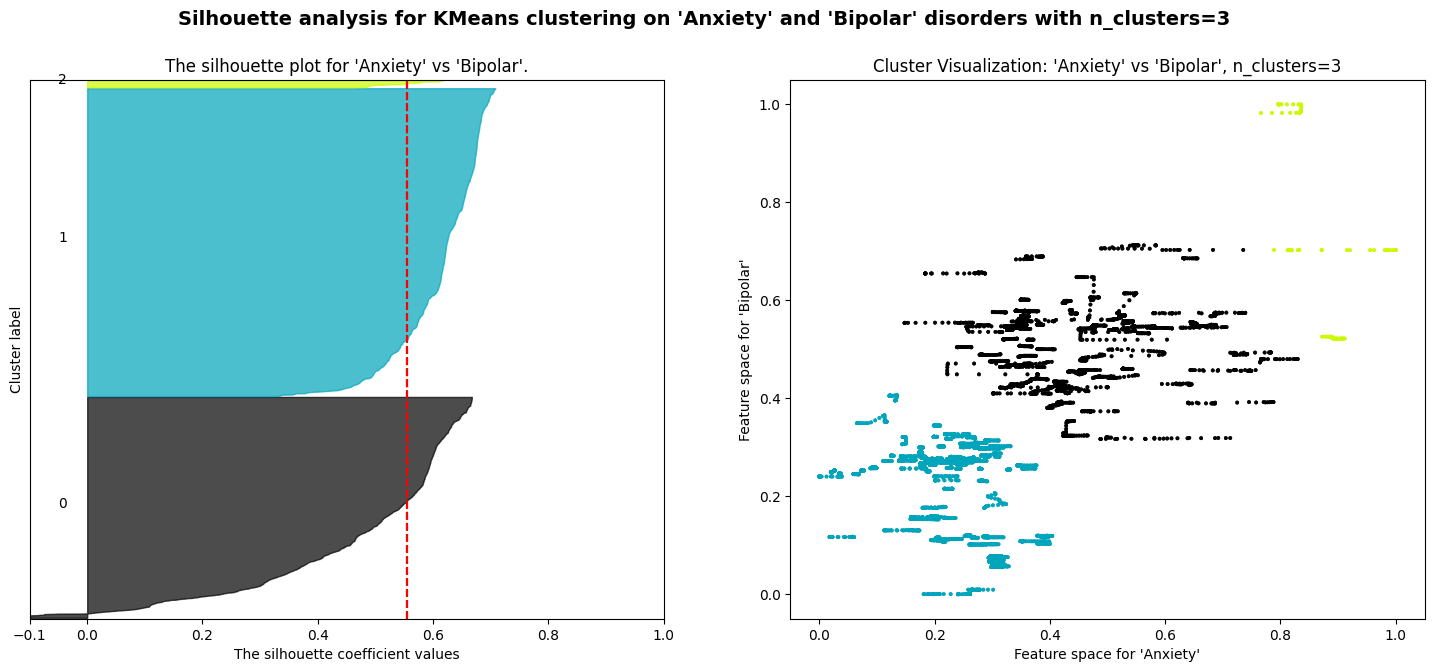


For n_clusters=4:	Average Silhouette Score=0.4887345093934093



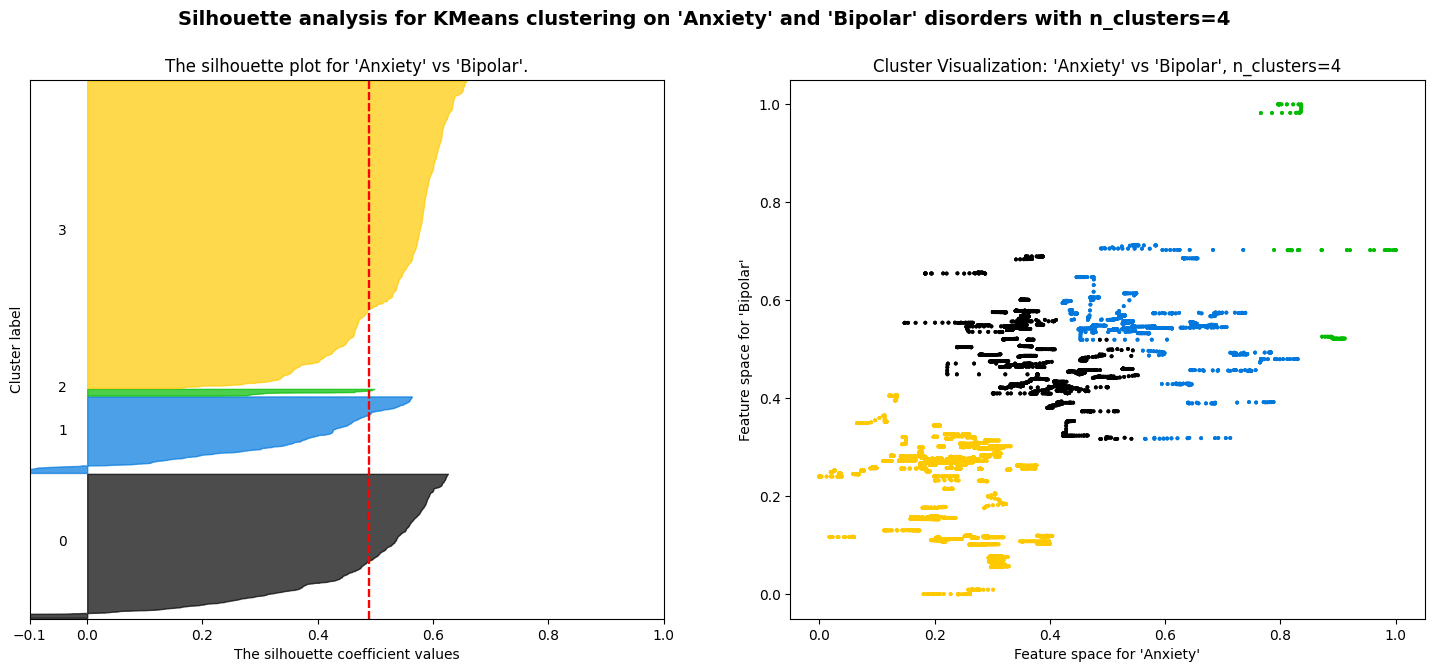


For n_clusters=5:	Average Silhouette Score=0.45187631968178005



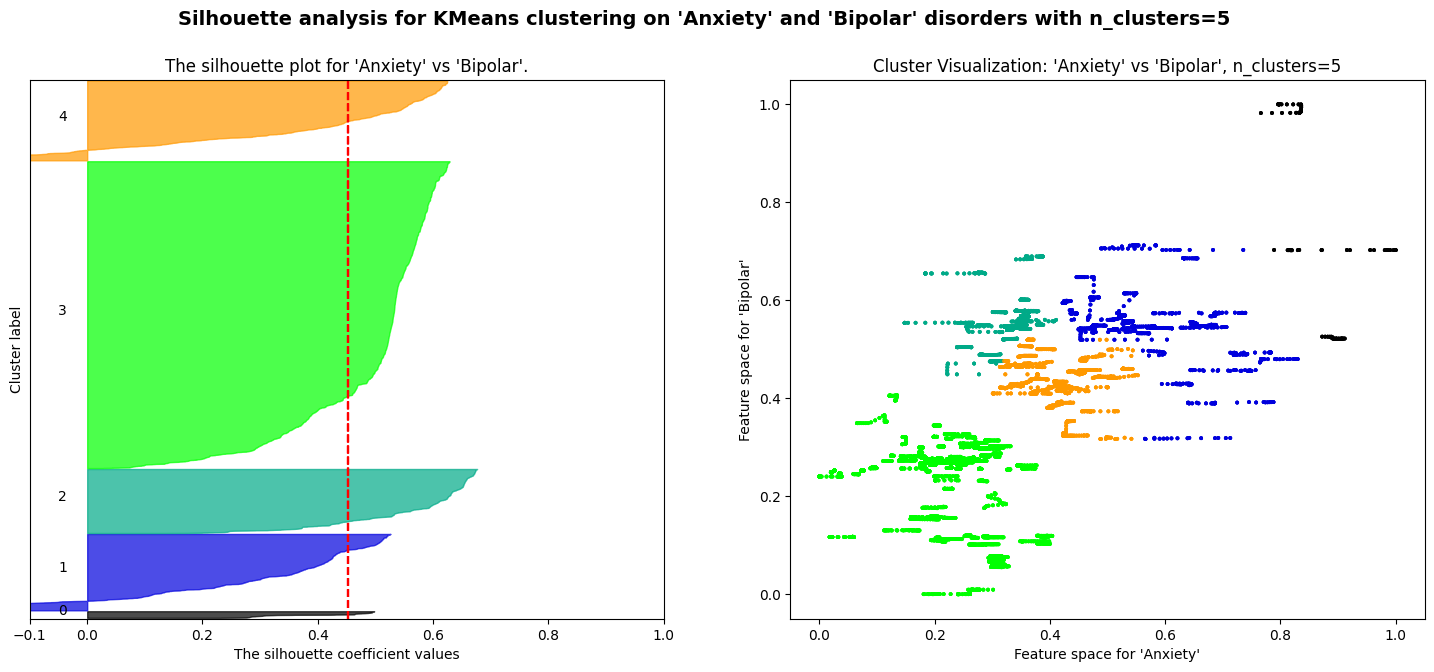

In [ ]:
# Clustering Anxiety and Bipolar disorders
X = df[["Anxiety", "Bipolar"]].values

for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer
  clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="complete")
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"\nFor n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}\n")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for 'Anxiety' vs 'Bipolar'.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    ax2.set_title(f"Cluster Visualization: 'Anxiety' vs 'Bipolar', n_clusters={n_clusters}")
    ax2.set_xlabel(f"Feature space for 'Anxiety'")
    ax2.set_ylabel(f"Feature space for 'Bipolar'")

    plt.suptitle(
      f"Silhouette analysis for KMeans clustering on 'Anxiety' and 'Bipolar' disorders with n_clusters={n_clusters}",
      fontsize=14,
      fontweight="bold",
    )

  plt.show()

>**INFERENCE**: Similar to the above analysis, for n_clusters=3, the cluster size of the 3rd cluster is very small as compared to other clusters. For `n_clusters=2`, the average silhouette score is the highest which verifies that for optimal results, n_clusters should be 2. And n_clusters=4 and 5, the average silhouette score is low as compared to n_clusters=2 and 3.


For n_clusters=2:	Average Silhouette Score=0.6229062293155062



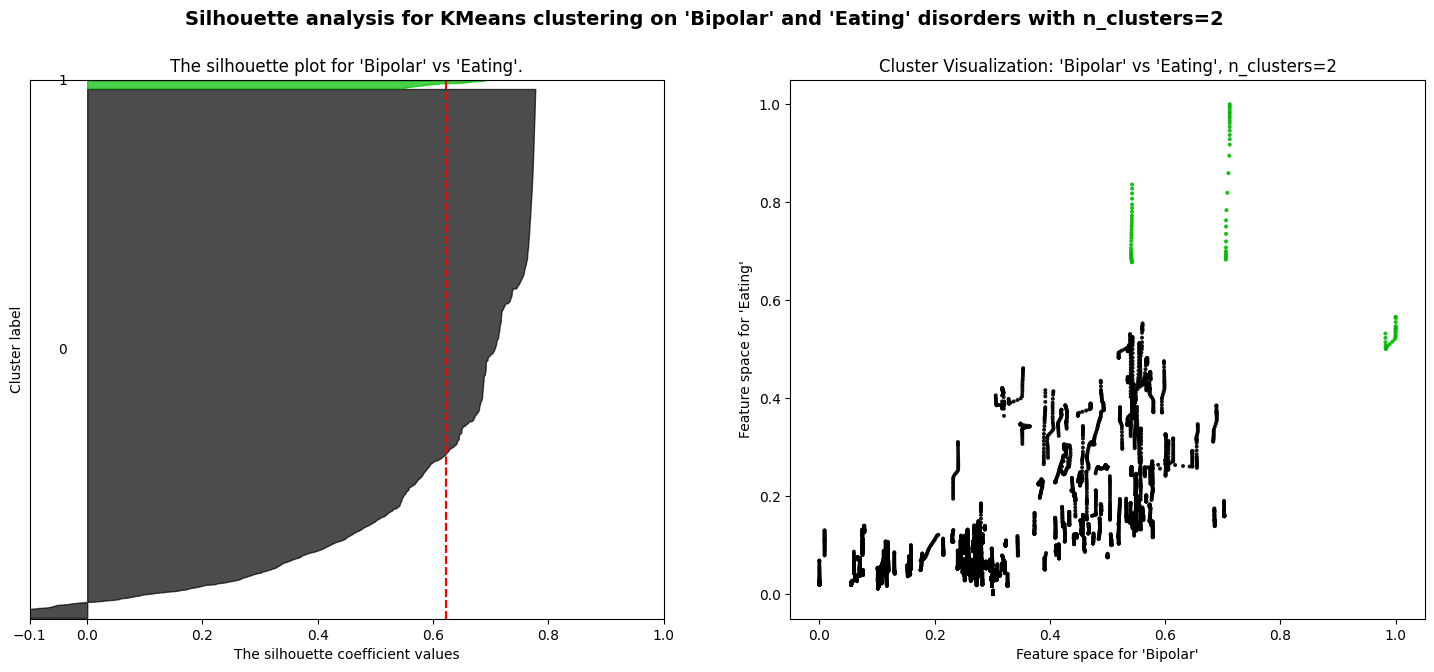


For n_clusters=3:	Average Silhouette Score=0.5889434313030674



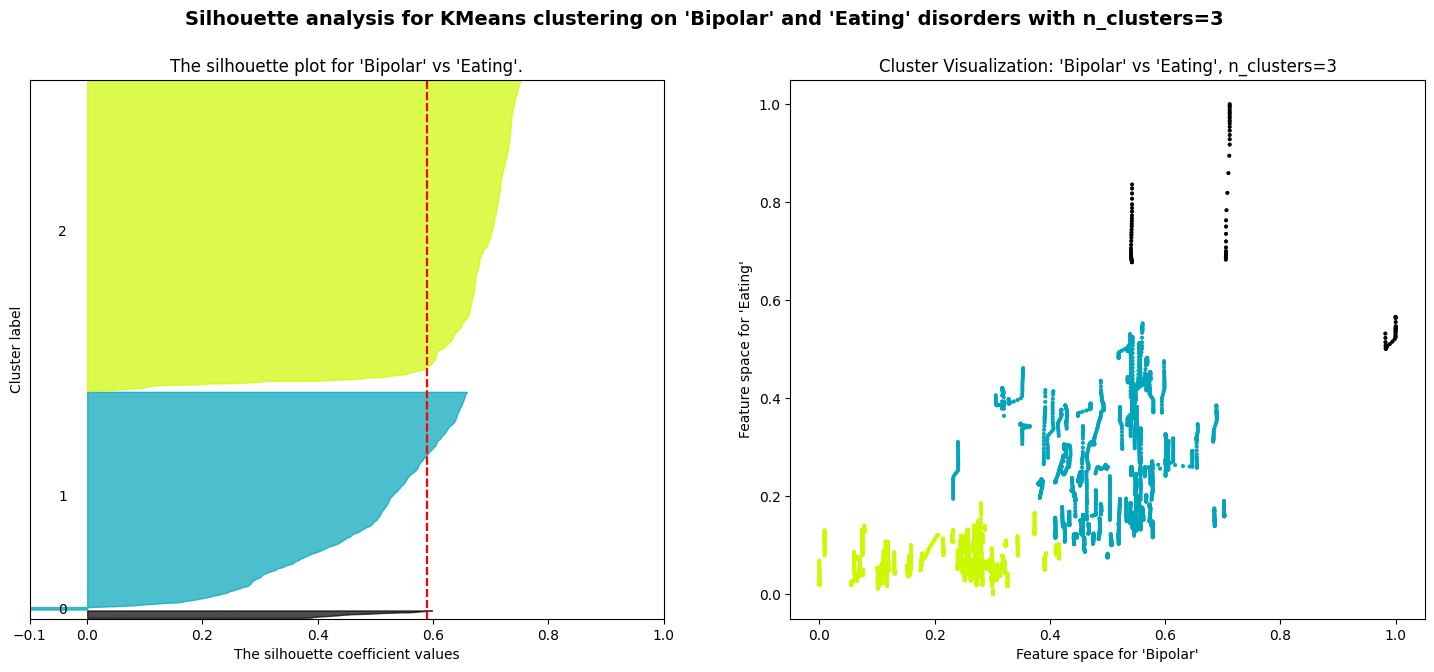


For n_clusters=4:	Average Silhouette Score=0.5883067538887433



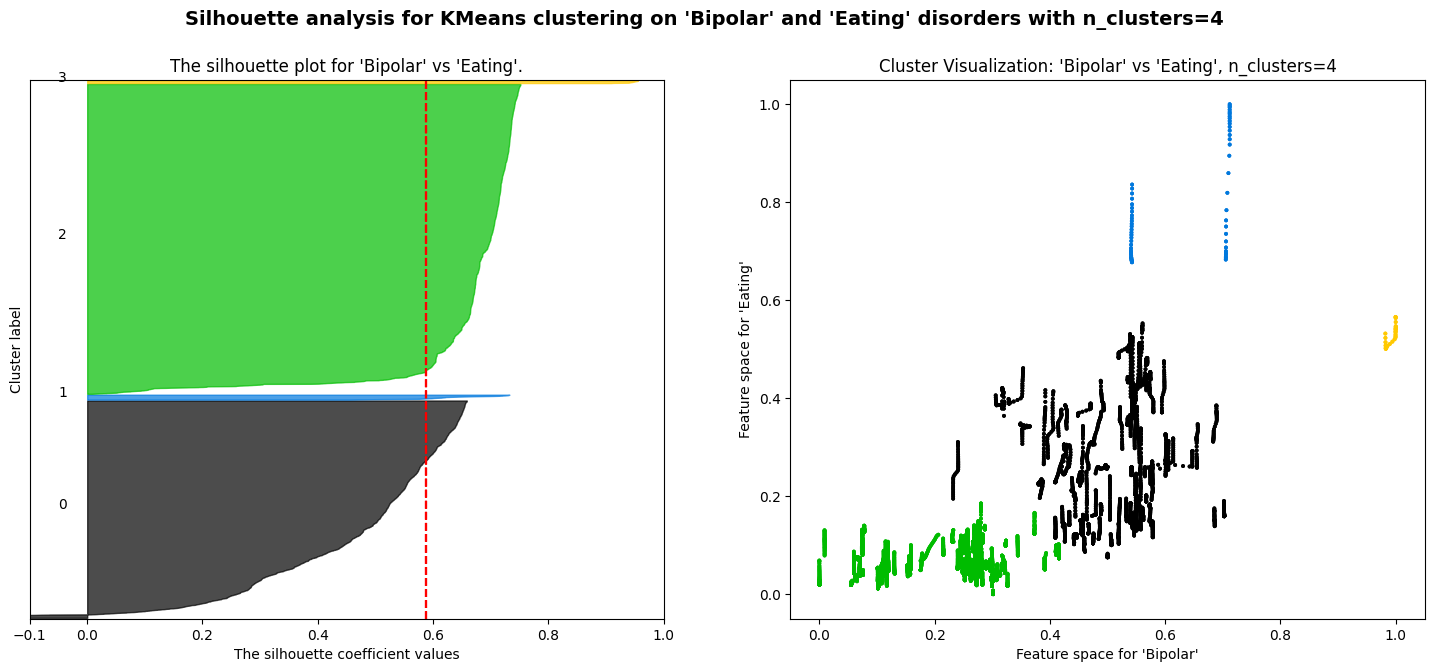


For n_clusters=5:	Average Silhouette Score=0.5073989814789589



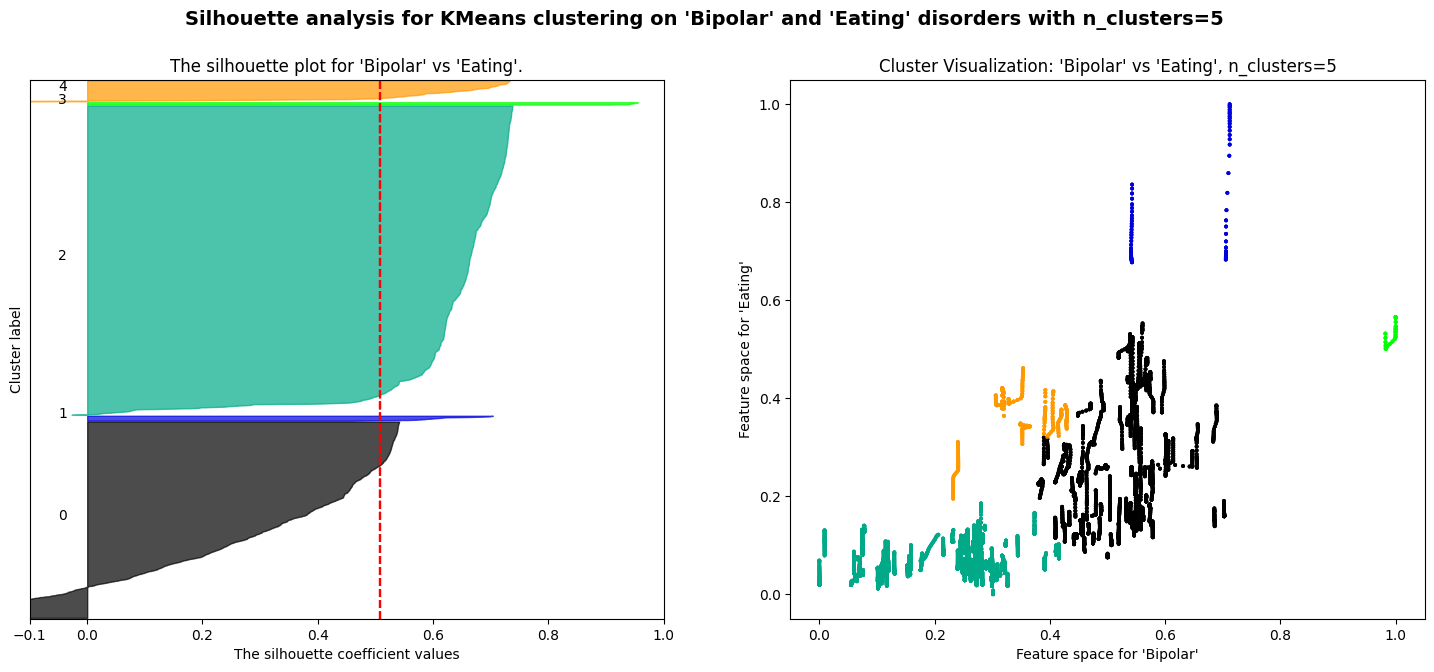

In [ ]:
# Clustering Bipolar and Eating disorders
X = df[["Bipolar", "Eating"]].values

for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer
  clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="complete")
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"\nFor n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}\n")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for 'Bipolar' vs 'Eating'.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    ax2.set_title(f"Cluster Visualization: 'Bipolar' vs 'Eating', n_clusters={n_clusters}")
    ax2.set_xlabel(f"Feature space for 'Bipolar'")
    ax2.set_ylabel(f"Feature space for 'Eating'")

    plt.suptitle(
      f"Silhouette analysis for KMeans clustering on 'Bipolar' and 'Eating' disorders with n_clusters={n_clusters}",
      fontsize=14,
      fontweight="bold",
    )

  plt.show()

>**INFERENCE**: For `n_clusters=2`, the average silhouette score is maximum. However, the cluster size of cluster number 1 (2nd cluster) is very small. The majority of the data points are distributed in cluster number 0 (1st cluster). Also, the difference between average silhouette scores of n_clusters=3 and n_clusters=4 is very low.

>**INFERENCE**: Clustering may not be the ideal technique to uncover relationship between Bipolar and Eating disorders as the cluster sizes for n_clusters=2 are very imbalanced. This suggests that data points cannot be grouped into clusters "efficiently" because of majority of data points present in 1st cluster and only few data points present in the 2nd cluster.

>From the above Silhouette Score analysis, the highest silhouette scores for each of the clusters are (upto 4 decimal places):
* `Anxiety` and `Eating`: 0.5657 (K=2)
* `Anxiety` and `Bipolar`: 0.5689  (K=2)
* `Bipolar` and `Eating`: 0.6229 (K=2)

>Thus, the optimal number of clusters calculated from the Dendogram can be verified using Silhouette Score Analysis

>From Agglomerative Clustering as well, we can conclude that `Bipolar` and `Eating` disorders have the strongest correlation. This analysis can further provide assurance to the medical professionals that Eating disorder have distinct patterns or characteristics that can be effectively separated into different clusters.


>KMeans and Agglomerative Clustering even though performed differently, but they provided the same conclusion.

##Advanced Clustering
Advanced clustering offers more accurate and nuanced grouping of data points, leading to richer insights and more precise decision-making. It leverages sophisticated algorithms and techniques to uncover hidden patterns and relationships within our dataset.

###Spectral Clustering
Spectral clustering is advantageous for several reasons. Firstly, it can effectively handle complex data structures by leveraging the eigenvalues and eigenvectors of a similarity matrix. This allows spectral clustering to capture non-linear relationships between data points, making it suitable for datasets with intricate patterns


####Performing Spectral clustering and analysing the Silhouette score simultaneously

For n_clusters=2:	Average Silhouette Score=0.5215845336367152
For n_clusters=3:	Average Silhouette Score=0.5211057990551112
For n_clusters=4:	Average Silhouette Score=0.4102353486476306
For n_clusters=5:	Average Silhouette Score=0.14930039172116033


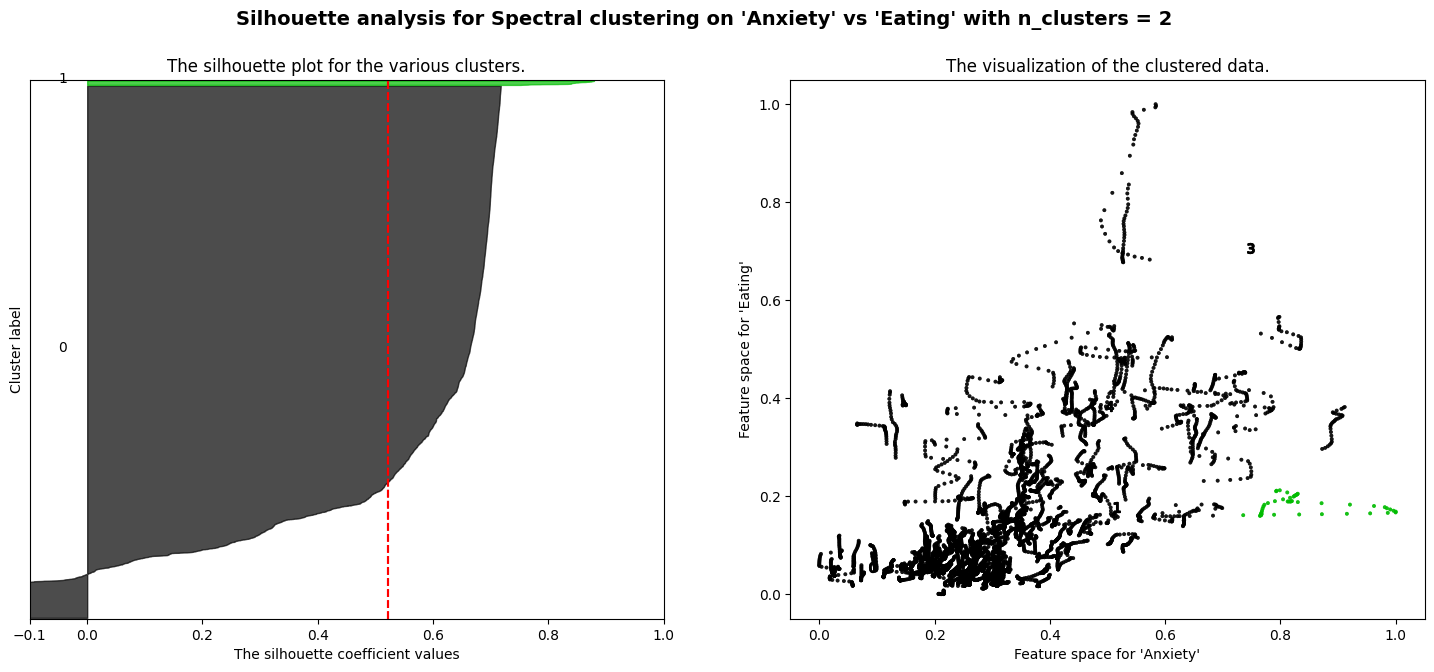

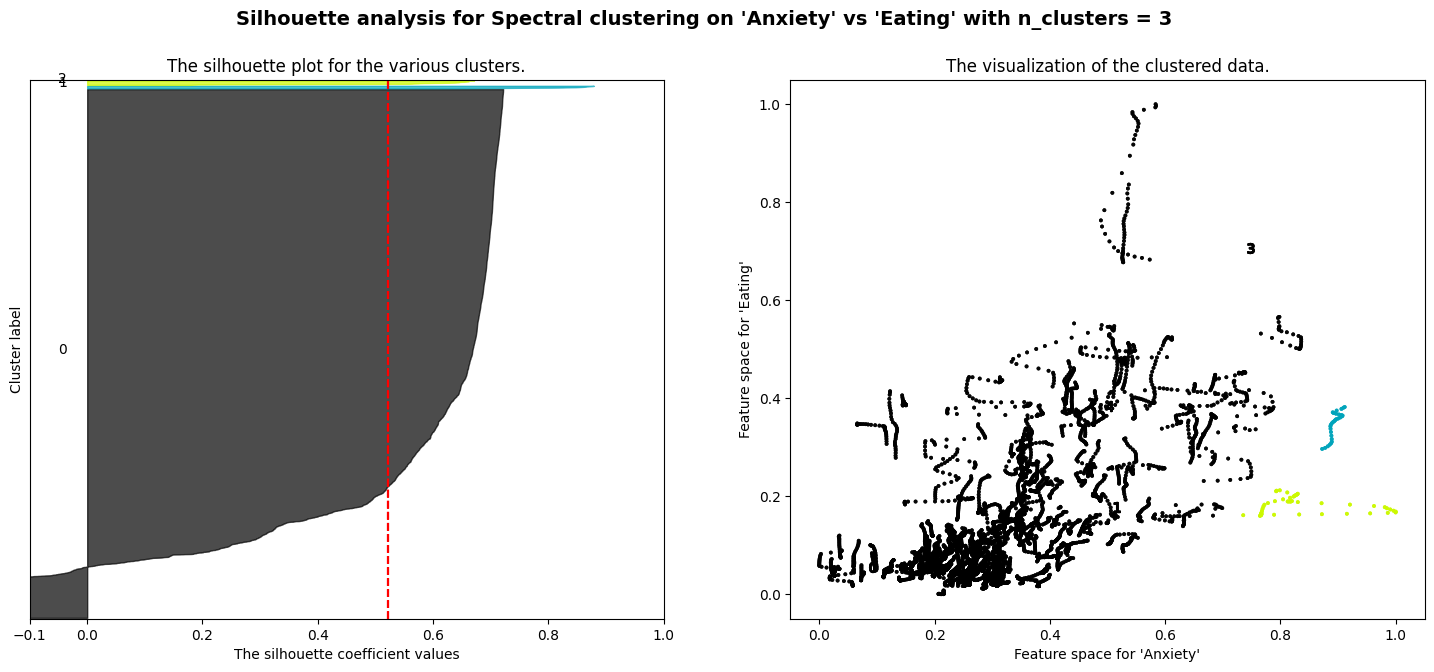

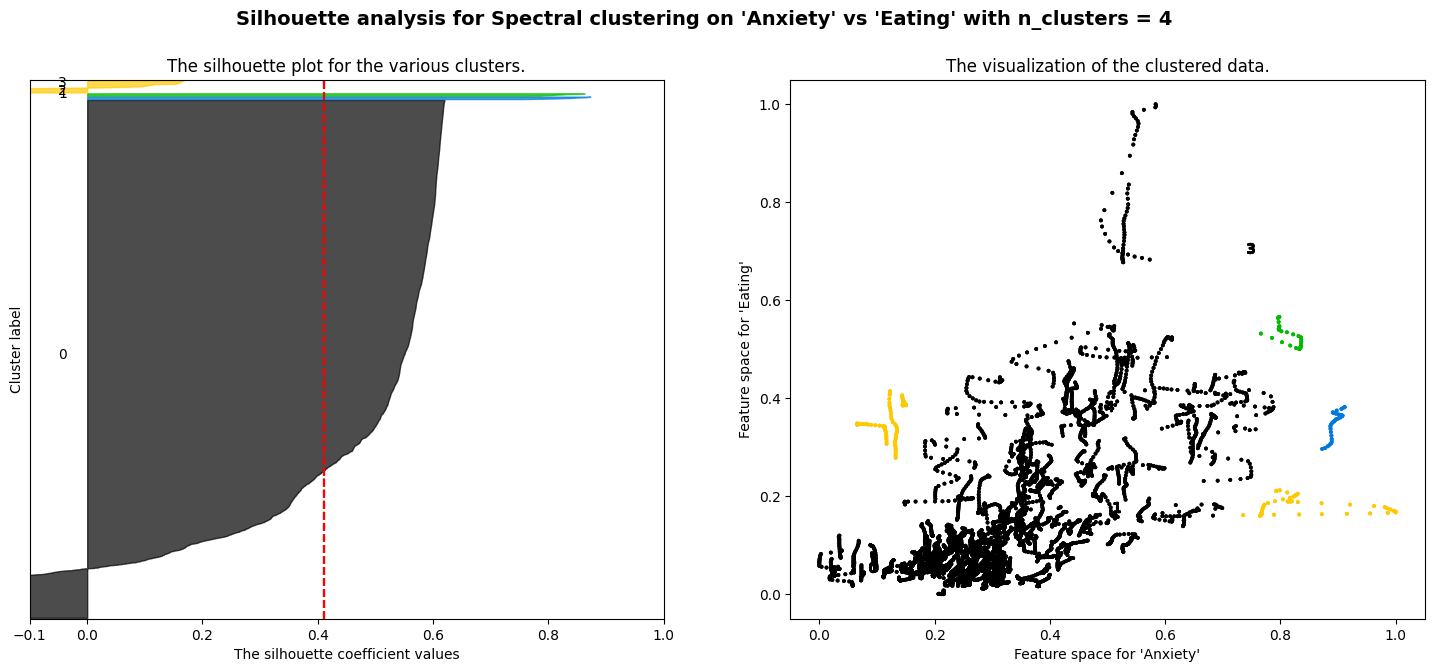

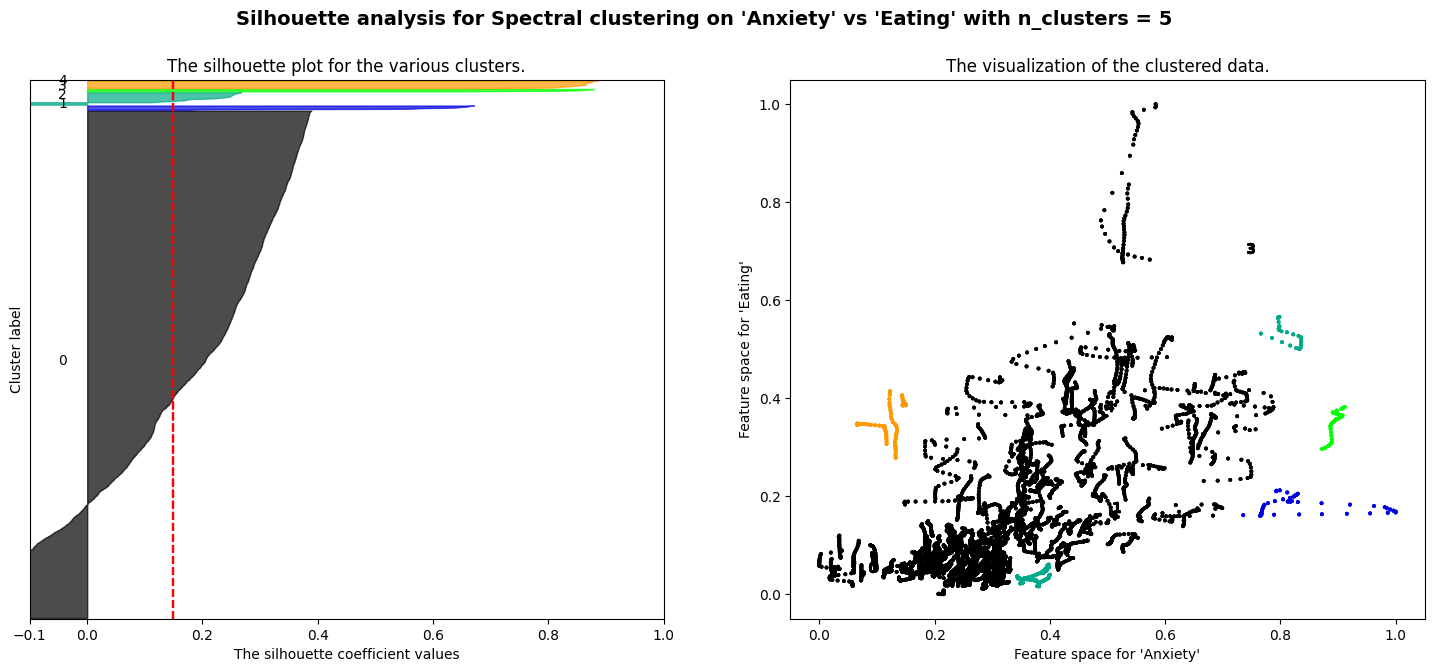

In [ ]:
range_n_clusters = [2, 3, 4, 5]

# Clustering Anxiety and Eating disorders
X = df[["Anxiety", "Eating"]].values

for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator
  clusterer = SpectralClustering(n_clusters=n_clusters, assign_labels='kmeans', affinity="nearest_neighbors", n_neighbors=10, random_state=42)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"For n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for 'Anxiety'")
    ax2.set_ylabel("Feature space for 'Eating'")

    plt.suptitle(
        "Silhouette analysis for Spectral clustering on 'Anxiety' vs 'Eating' with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

>**INFERENCE**: For n_clusters=2 and 3, the average silhouette scores are fairly good and almost equal, but the issue is the cluster sizes differ significantly. For n_clusters=4 and 5, the silhouette scores are poor, which suggests how dissimilar a datapoint is to its own cluster compared to other clusters.

>**INFERENCE**: Also, fraction of cluster 0 (1st cluster) lies in the -x axis, which suggests their silhouette coefficient is negative, a negative silhouette coefficient suggests that the data point is closer to a neighboring cluster than to its own cluster.

For n_clusters=2:	Average Silhouette Score=0.2440265367652122
For n_clusters=3:	Average Silhouette Score=-0.33893441865141305
For n_clusters=4:	Average Silhouette Score=-0.30941741965709474
For n_clusters=5:	Average Silhouette Score=-0.46537041159049825


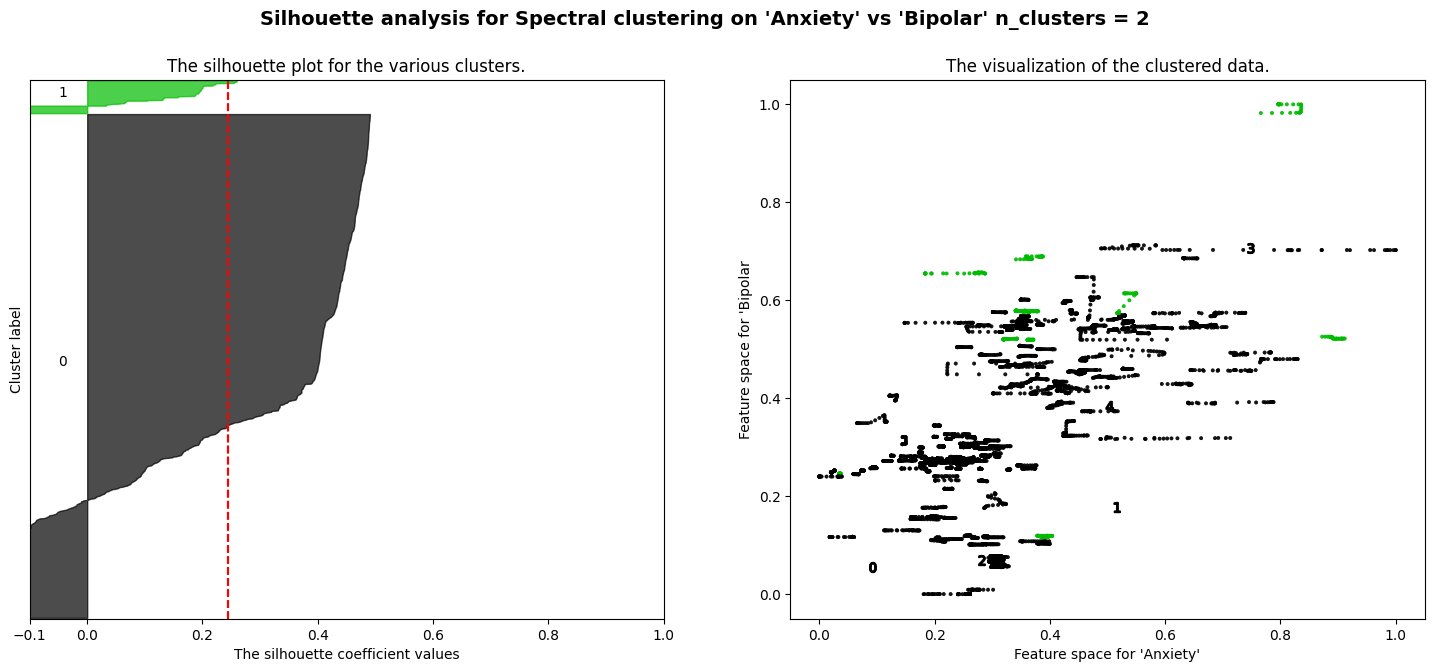

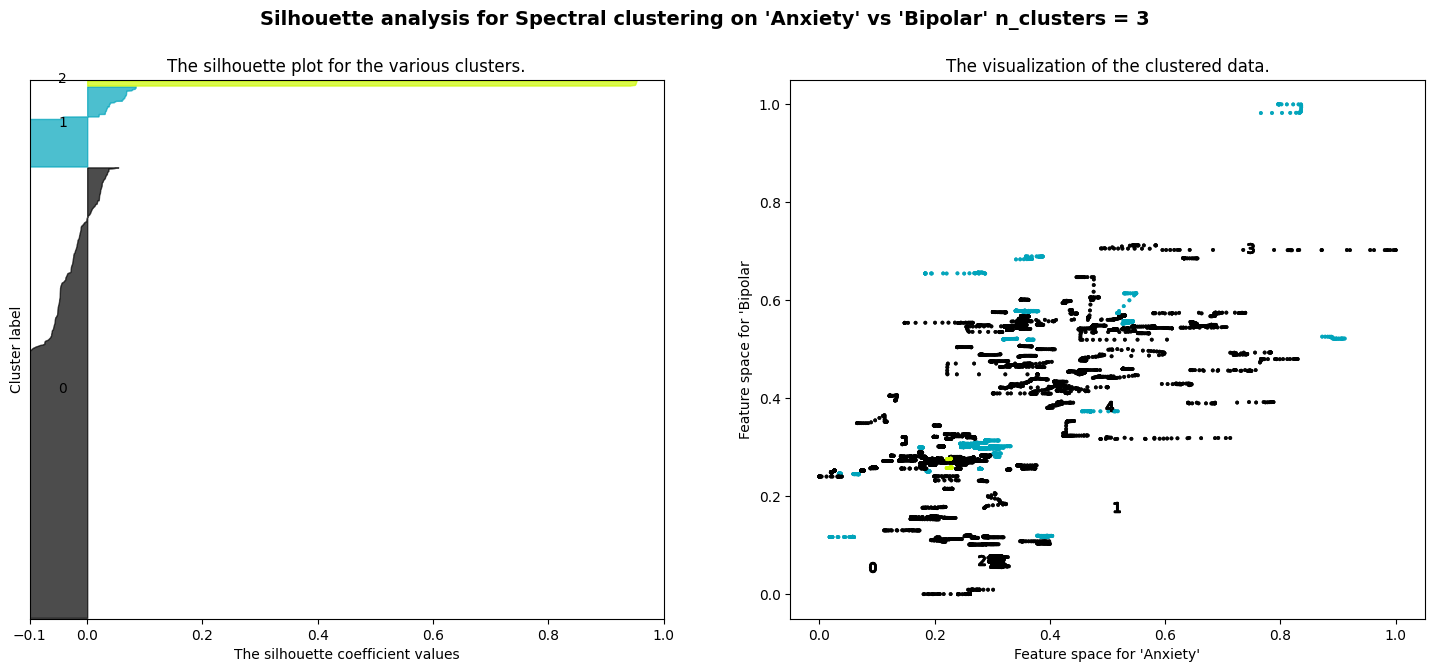

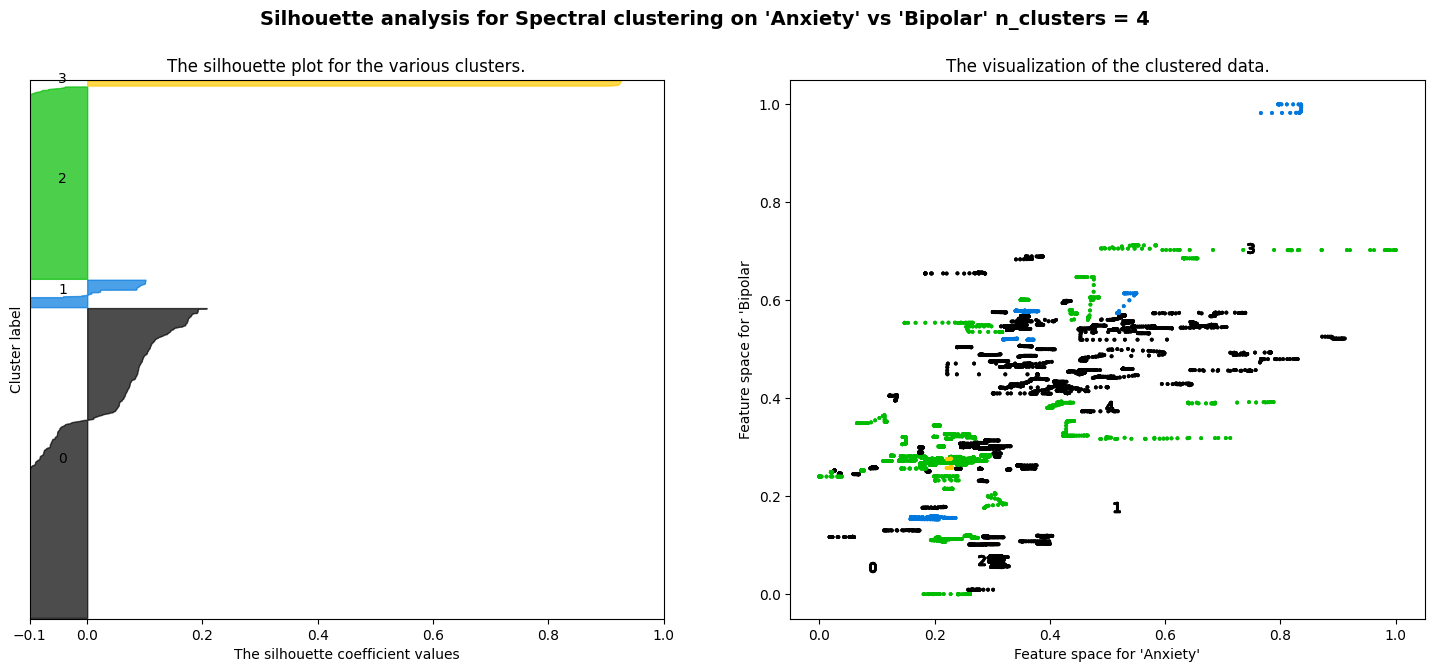

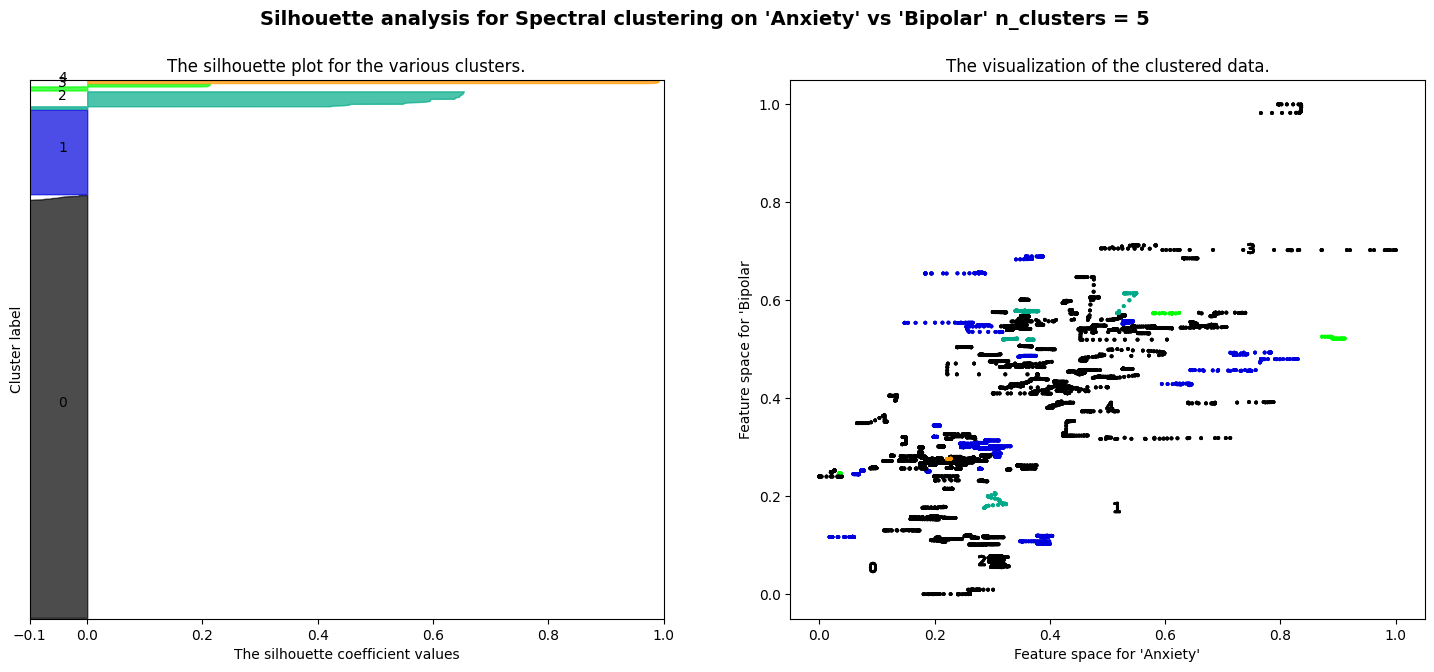

In [ ]:
range_n_clusters = [2, 3, 4, 5]

# Clustering Anxiety and Bipolar disorders
X = df[["Anxiety", "Bipolar"]].values

for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator
  clusterer = SpectralClustering(n_clusters=n_clusters, assign_labels='kmeans', affinity="nearest_neighbors", n_neighbors=10, random_state=42)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"For n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for 'Anxiety'")
    ax2.set_ylabel("Feature space for 'Bipolar")

    plt.suptitle(
        "Silhouette analysis for Spectral clustering on 'Anxiety' vs 'Bipolar' n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

>**INFERENCE**: The silhouette coefficients are negative for n_clusters=3,4,5 and 0.22 for n_clusters=2, this suggests that the Spectral Clustering is not a suitable method for clustering the data, since negative silhouette score implies that the datapoints have been assigned to the wrong clusters.

For n_clusters=2:	Average Silhouette Score=0.4265269636868457
For n_clusters=3:	Average Silhouette Score=0.10195824564432583
For n_clusters=4:	Average Silhouette Score=-0.02467256886638162
For n_clusters=5:	Average Silhouette Score=0.09575324866248423


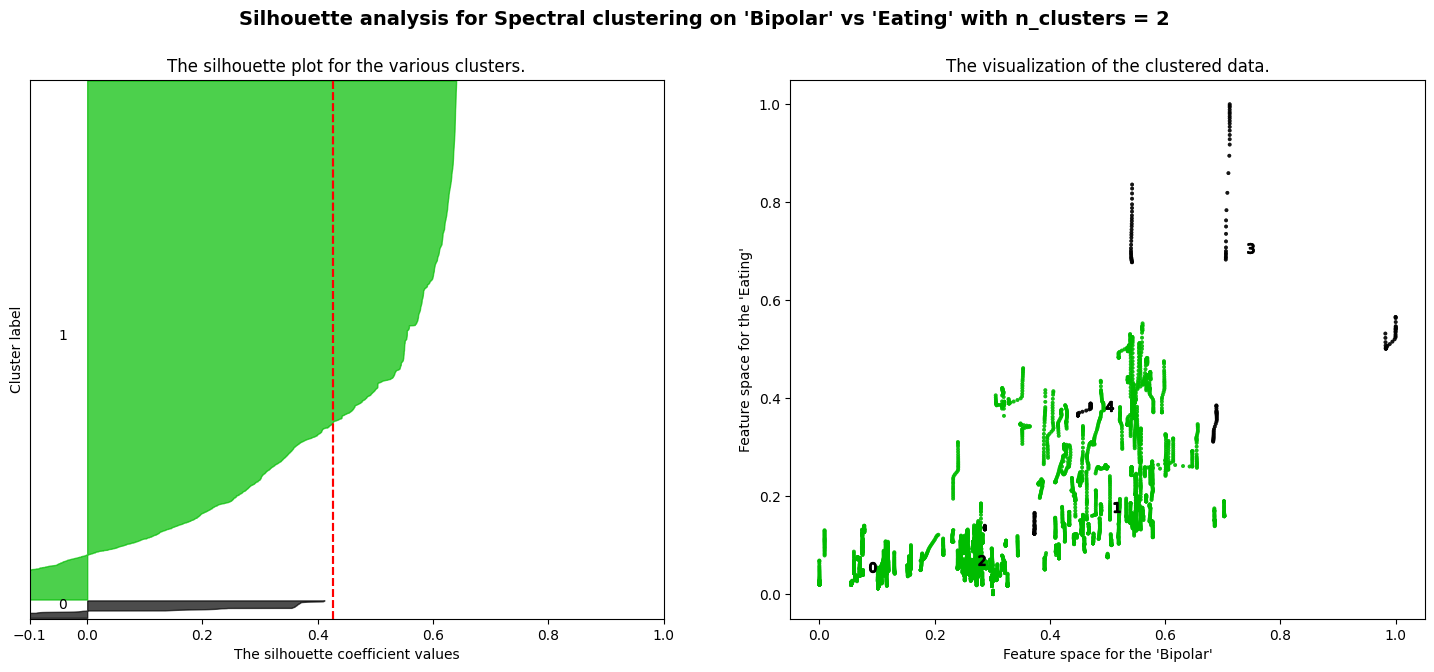

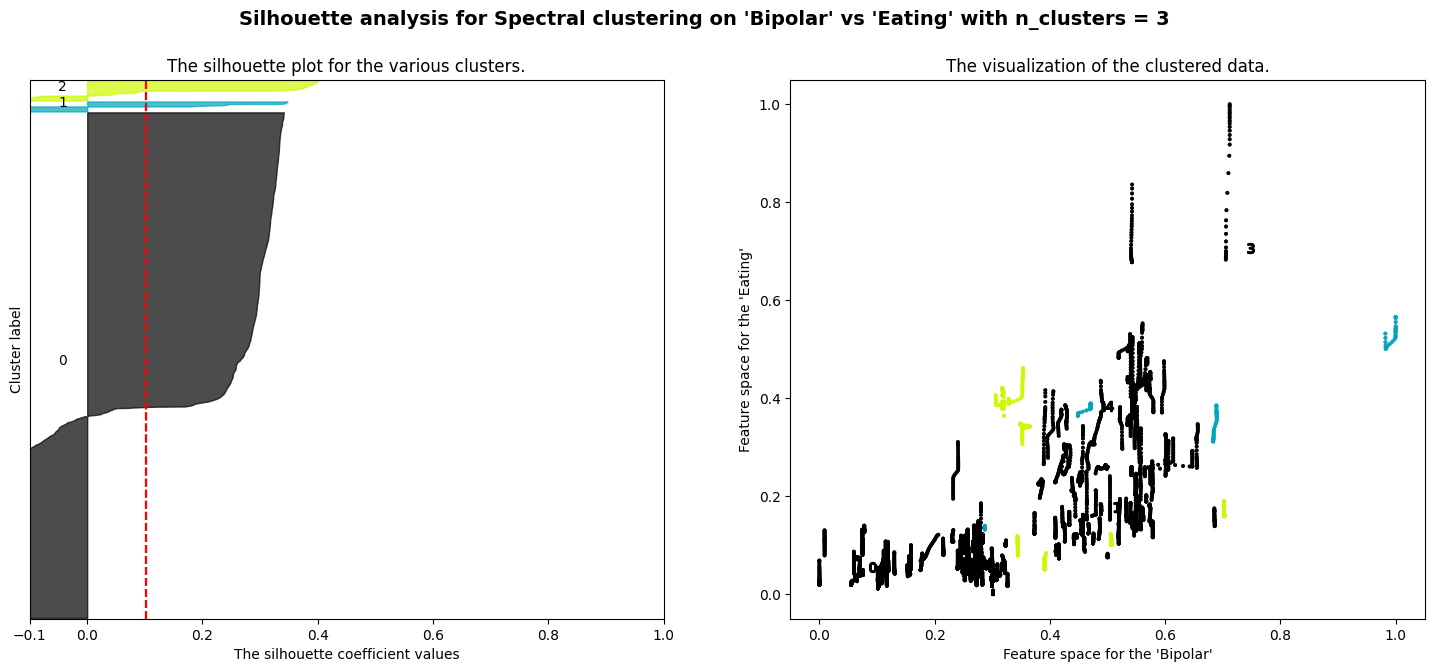

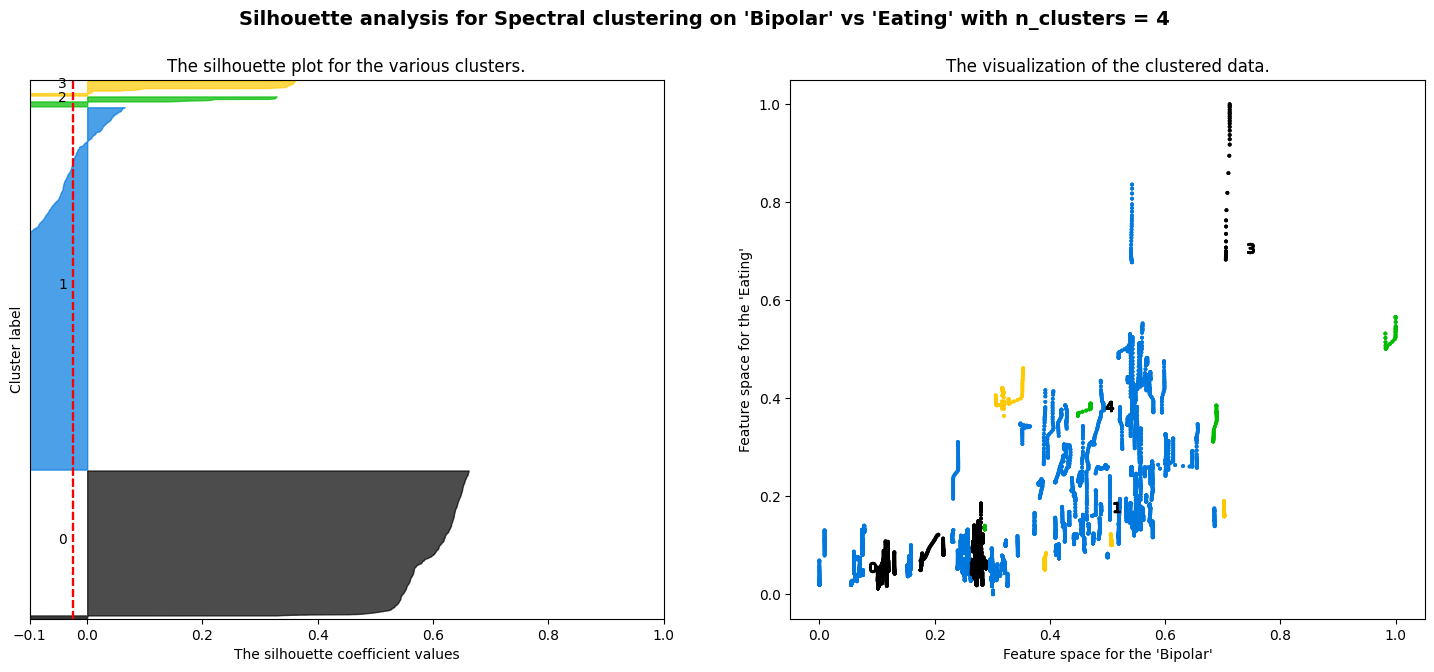

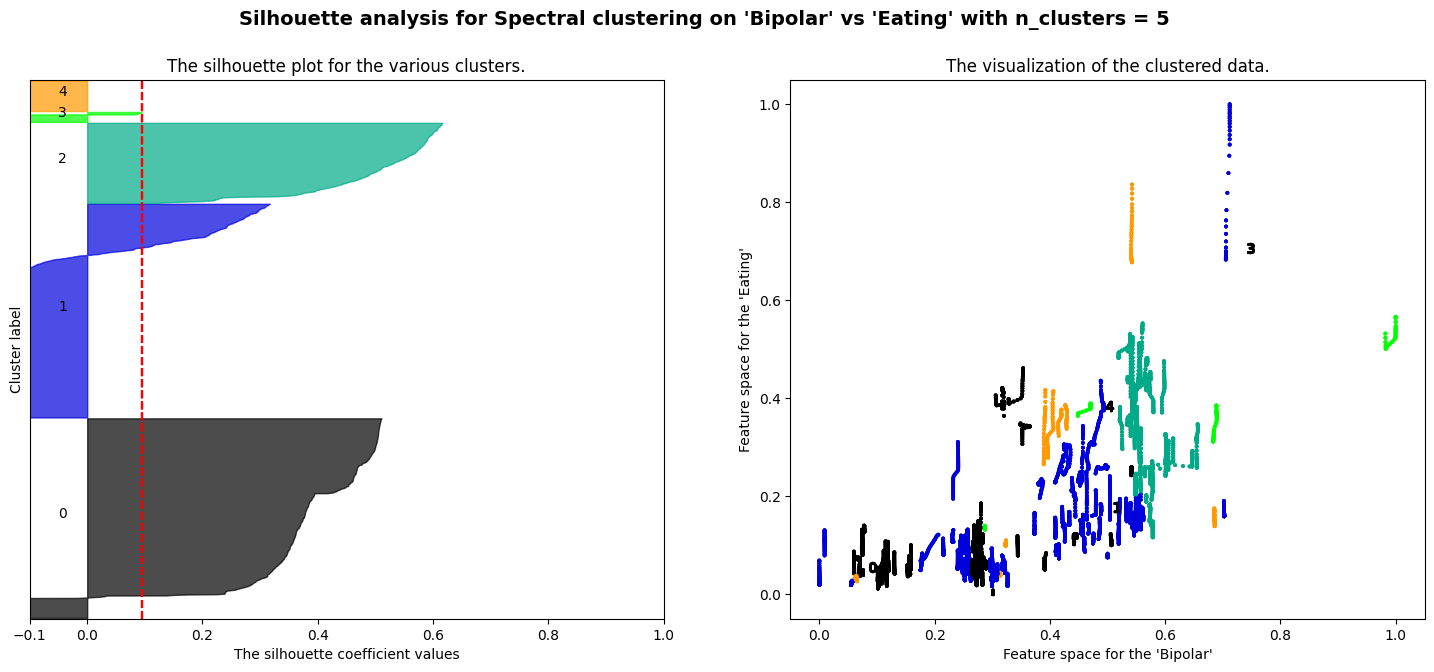

In [ ]:
range_n_clusters = [2, 3, 4, 5]

# Clustering Bipolar and Eating disorders
X = df[["Bipolar", "Eating"]].values

for n_clusters in range_n_clusters:
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(X) + (n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator
  clusterer = SpectralClustering(n_clusters=n_clusters, assign_labels='kmeans', affinity="nearest_neighbors", n_neighbors=10, random_state=42)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"For n_clusters={n_clusters}:\tAverage Silhouette Score={silhouette_avg}")

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 'Bipolar'")
    ax2.set_ylabel("Feature space for the 'Eating'")

    plt.suptitle(
        "Silhouette analysis for Spectral clustering on 'Bipolar' vs 'Eating' with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

>**INFERENCE**: Similar to the above two results for Spectral Clustering, for n_clusters=2, the cluster sizes of both the clusters differ significantly. For rest of the ranges of clusters (3,4,5), silhouette scores are very low.

>In conclusion, for either of the `feature_pairs` (Anxiety and Eating, Anxiety and Bipolar, Bipolar and eating disorders), Spectral Clustering is not a suitable method of clustering.

###DBSCAN Clustering

DBSCAN is great for identifying clusters of any shape and handling datasets with varying densities without needing the number of clusters upfront. It's robust against noise, due to its ability to differentiate core points, border points, and noise points based on local density information, ensuring more accurate clustering results.

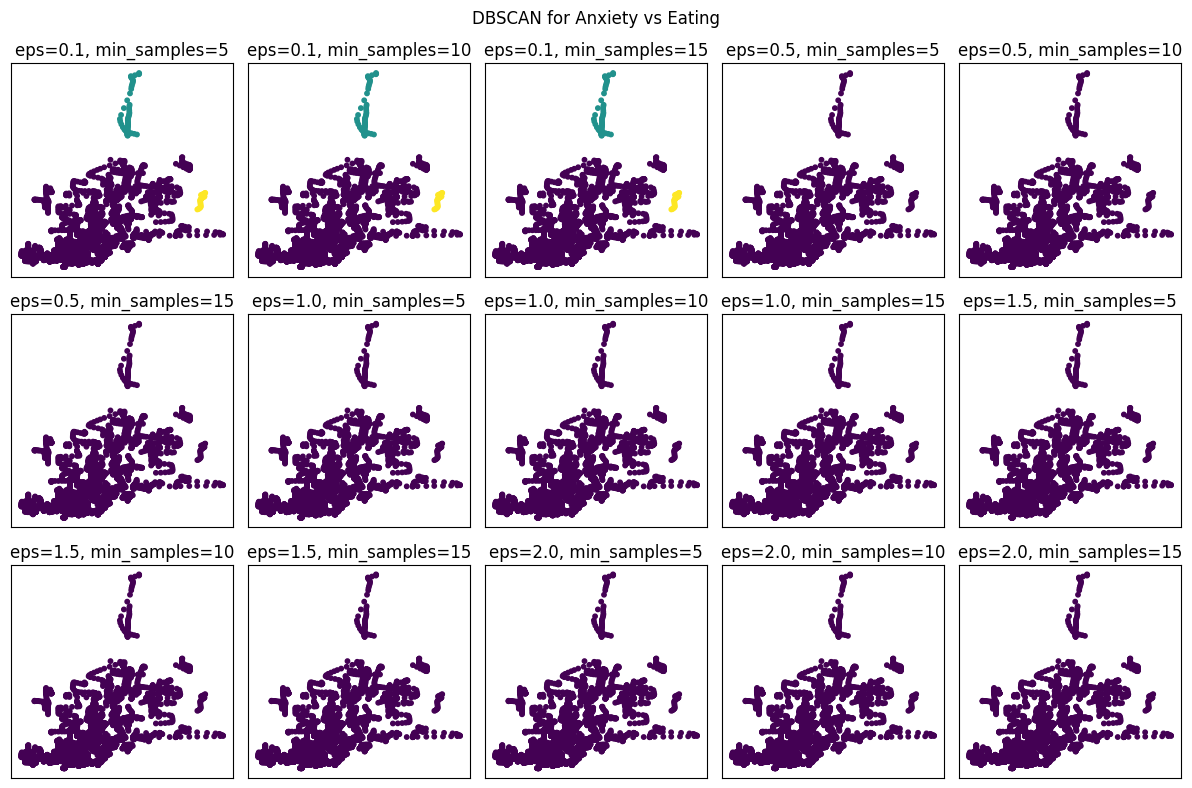

In [ ]:
# Initialize lists to store labels for different parameter combinations
labels_list = []
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]  # epsilon values
min_samples_values = [5, 10, 15]  # min_samples values

# Clustering Anxiety and Eating disorders
X = df[["Anxiety", "Eating"]].values

# Iterate over different combinations of epsilon and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels_list.append((eps, min_samples, dbscan.labels_))

# Visualizing the clusters
plt.figure(figsize=(12, 8))

for i, (eps, min_samples, labels) in enumerate(labels_list, 1):
    plt.subplot(3, 5, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'eps={eps}, min_samples={min_samples}')
    plt.xticks([])
    plt.yticks([])

plt.suptitle("DBSCAN for Anxiety vs Eating")
plt.tight_layout()
plt.show()

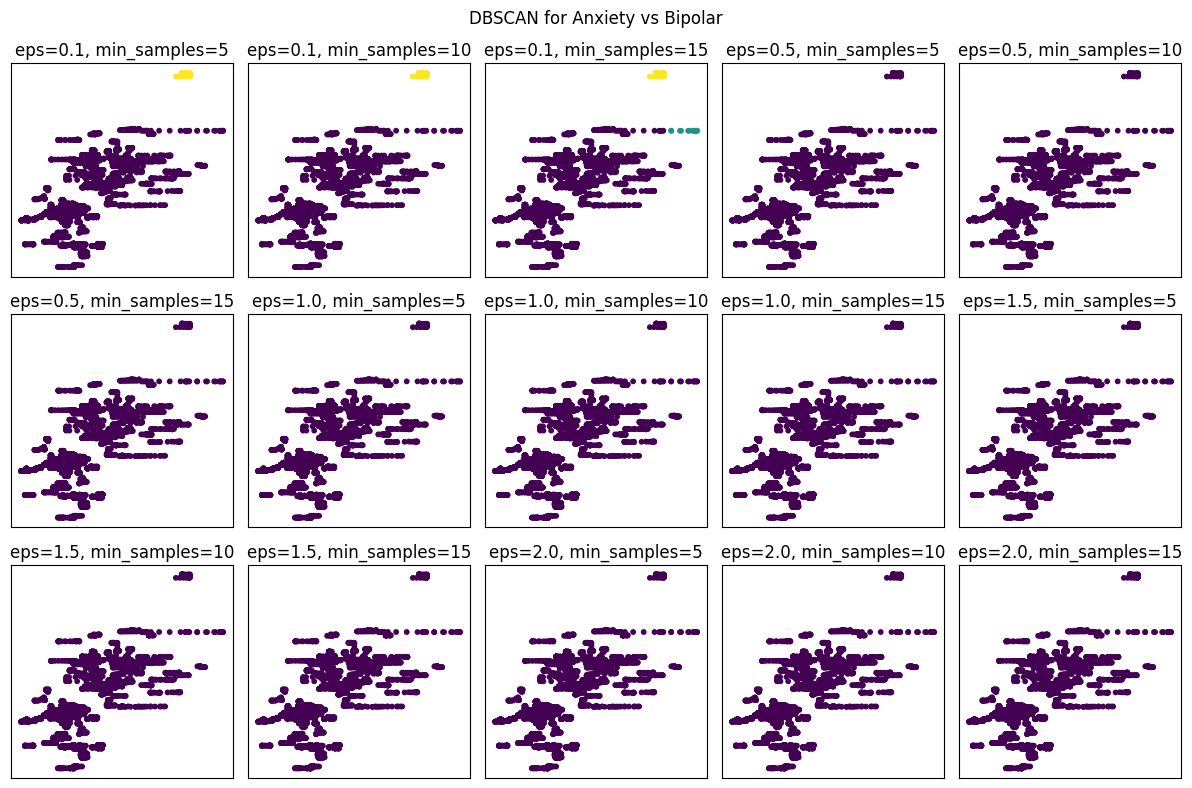

In [ ]:
labels_list = []
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]  # epsilon values
min_samples_values = [5, 10, 15]  # min_samples values

# Clustering Anxiety and Eating disorders
X = df[["Anxiety", "Bipolar"]].values

# Iterate over different combinations of epsilon and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels_list.append((eps, min_samples, dbscan.labels_))

# Visualizing the clusters
plt.figure(figsize=(12, 8))

for i, (eps, min_samples, labels) in enumerate(labels_list, 1):
    plt.subplot(3, 5, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'eps={eps}, min_samples={min_samples}')
    plt.xticks([])
    plt.yticks([])

plt.suptitle("DBSCAN for Anxiety vs Bipolar")
plt.tight_layout()
plt.show()

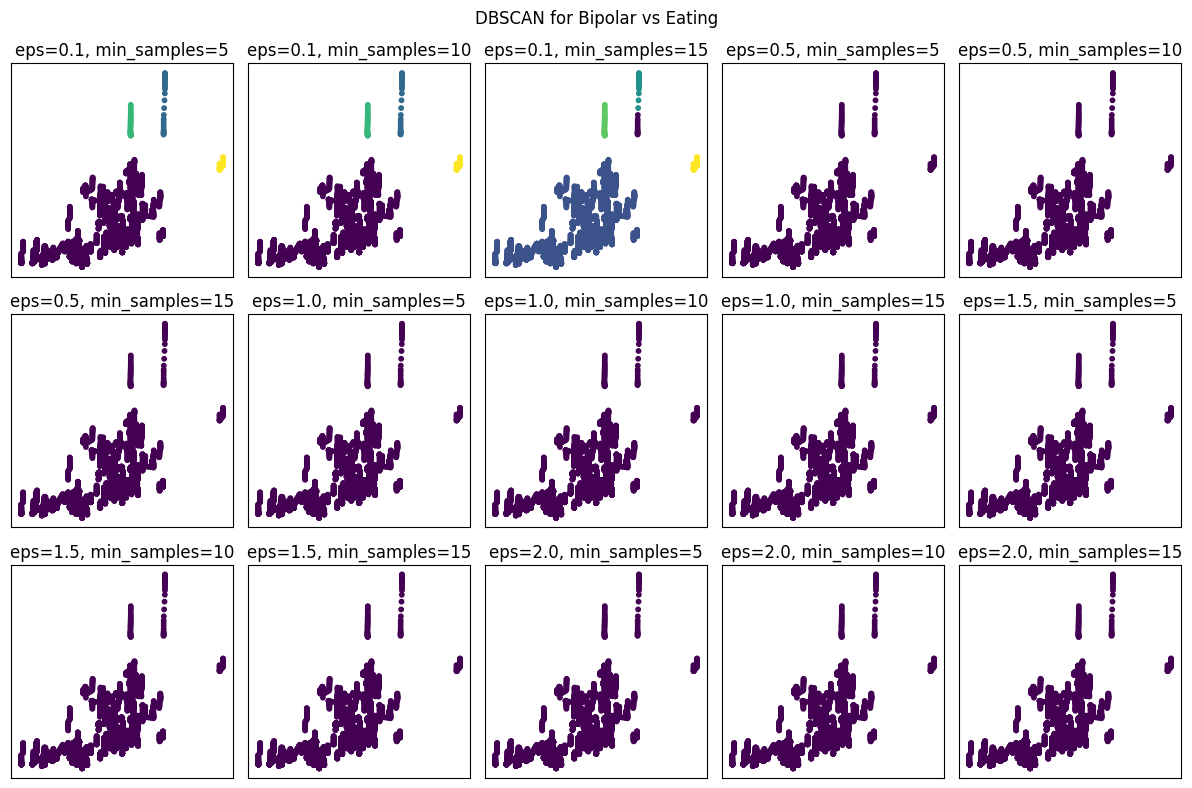

In [ ]:
labels_list = []
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]  # epsilon values
min_samples_values = [5, 10, 15]  # min_samples values

# Clustering Anxiety and Eating disorders
X = df[["Bipolar", "Eating"]].values

# Iterate over different combinations of epsilon and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels_list.append((eps, min_samples, dbscan.labels_))

# Visualizing the clusters
plt.figure(figsize=(12, 8))

for i, (eps, min_samples, labels) in enumerate(labels_list, 1):
    plt.subplot(3, 5, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'eps={eps}, min_samples={min_samples}')
    plt.xticks([])
    plt.yticks([])

plt.suptitle("DBSCAN for Bipolar vs Eating")
plt.tight_layout()
plt.show()

>**INFERENCE**: From the above plots, even without performing Silhouette Score Analysis, we can visualize that DBSCAN clustering algorithm has resulted in assigning all the data points to a single cluster, for most of the cases, and for very few cases, there are presence of two clusters, but the cluster sizes differ significantly, in this scenario too.

##Comparing the Clustering techniques
Comparing all the clustering techniques to conclude which clustering technique works best for our dataset.

>So far, the metric for evaluating how good the clusters are, has been Silhouette Score. Silhouette score analysis has helped conclude that Agglomerative Clustering and KMeans Clustering have performed well on the dataset.

###Comparing the results of KMeans and Agglomerative Clustering
Comparing the `best` results of KMeans and Agglomerative Clustering

In [ ]:
silhouette_score_dict = {
    "KMeans": [0.4309, 0.5194, 0.5775],
    "Agglomerative": [0.5657, 0.5689, 0.6229]
}

silhouette_score_df = pd.DataFrame.from_dict(silhouette_score_dict, columns=["Anxiety vs Eating", "Anxiety vs Bipolar", "Bipolar and Eating"], orient="index")
silhouette_score_df

Anxiety vs Eating  Anxiety vs Bipolar  Bipolar and Eating
KMeans                    0.4309              0.5194              0.5775
Agglomerative             0.5657              0.5689              0.6229

<Figure size 1000x700 with 0 Axes>

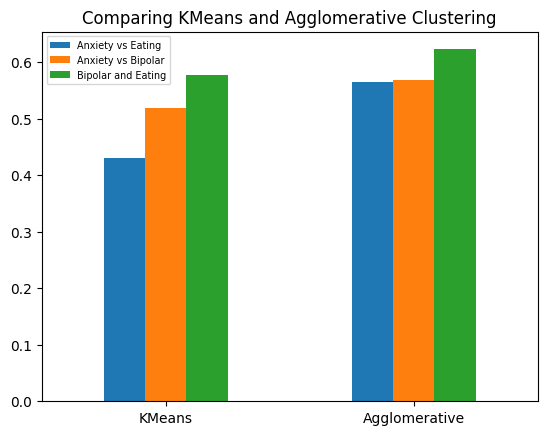

In [ ]:
plt.figure(figsize=(10,7))
silhouette_score_df.plot(kind="bar", rot=0)
plt.legend(loc="best", fontsize="x-small")
plt.title("Comparing KMeans and Agglomerative Clustering")
plt.show()

>**INFERENCE**: Looking at the above bar plot, we can conclude that Agglomerative Clustering out-performs KMeans Clustering for all the pairs of disorders. Thus, Agglomerative Clustering is the best suited clustering technique for the given problem statement.

#Conclusion


> * After clustering various disorders and using different clustering algorithms to do so, we have achieved a greater understanding of how mental health disorders can be differentiated amongst each other so that we get a better diagnosis of the patient.
* This approach can help medical professionals and organizations facilitate targeted interventions and improve mental health globally. Also, the problem of inaccurate diagnosis due to overlapping symtoms can be solved using clustering techniques to get a deeper understanding of mental health disorders and how one can be differentiated with the other in terms of symptoms.
* Agglomerative Clustering is the best suited clustering technique for the dataset. Results of Agglomerative Clustering are:
  * `Anxiety` and `Eating`: 0.5657
  * `Anxiety` and `Bipolar`: 0.5689
  * `Bipolar` and `Eating`: 0.6229

